In [1]:
# import library
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Func import TreeModel, BestModel
from Func import prepro, pca_data

import tensorflow as tf
from sklearn.decomposition import PCA

# seed
import os
seed = 123
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## Dataset

In [2]:
# load dataset
boston = load_boston()

# dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([data, target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.describe()
# CRIM = 범죄율 / ZN = 25,000 평방피트 초과 거주지역 비율
# INDUS = 비소매상업지역 면적 비율 / CHAS = 찰스강의 경계 위치 여부(위치=1,아니면=0)
# NOX = 일산화질소 농도 / RM = 주택당 방 수 / AGE = 1940년 이전에 건축된 주택의 비율
# DIS = 직업센터의 거리 / RAD = 방사형 고속도로까지의 거리 / TAX = 재산세율
# PTRATIO = 학생,교사 비율 / B = 인구 중 흑인 비율 / LSTAT = 인구 중 하위 계층 비율
# MEDV = 1978년 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값(단위:1,000달러)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


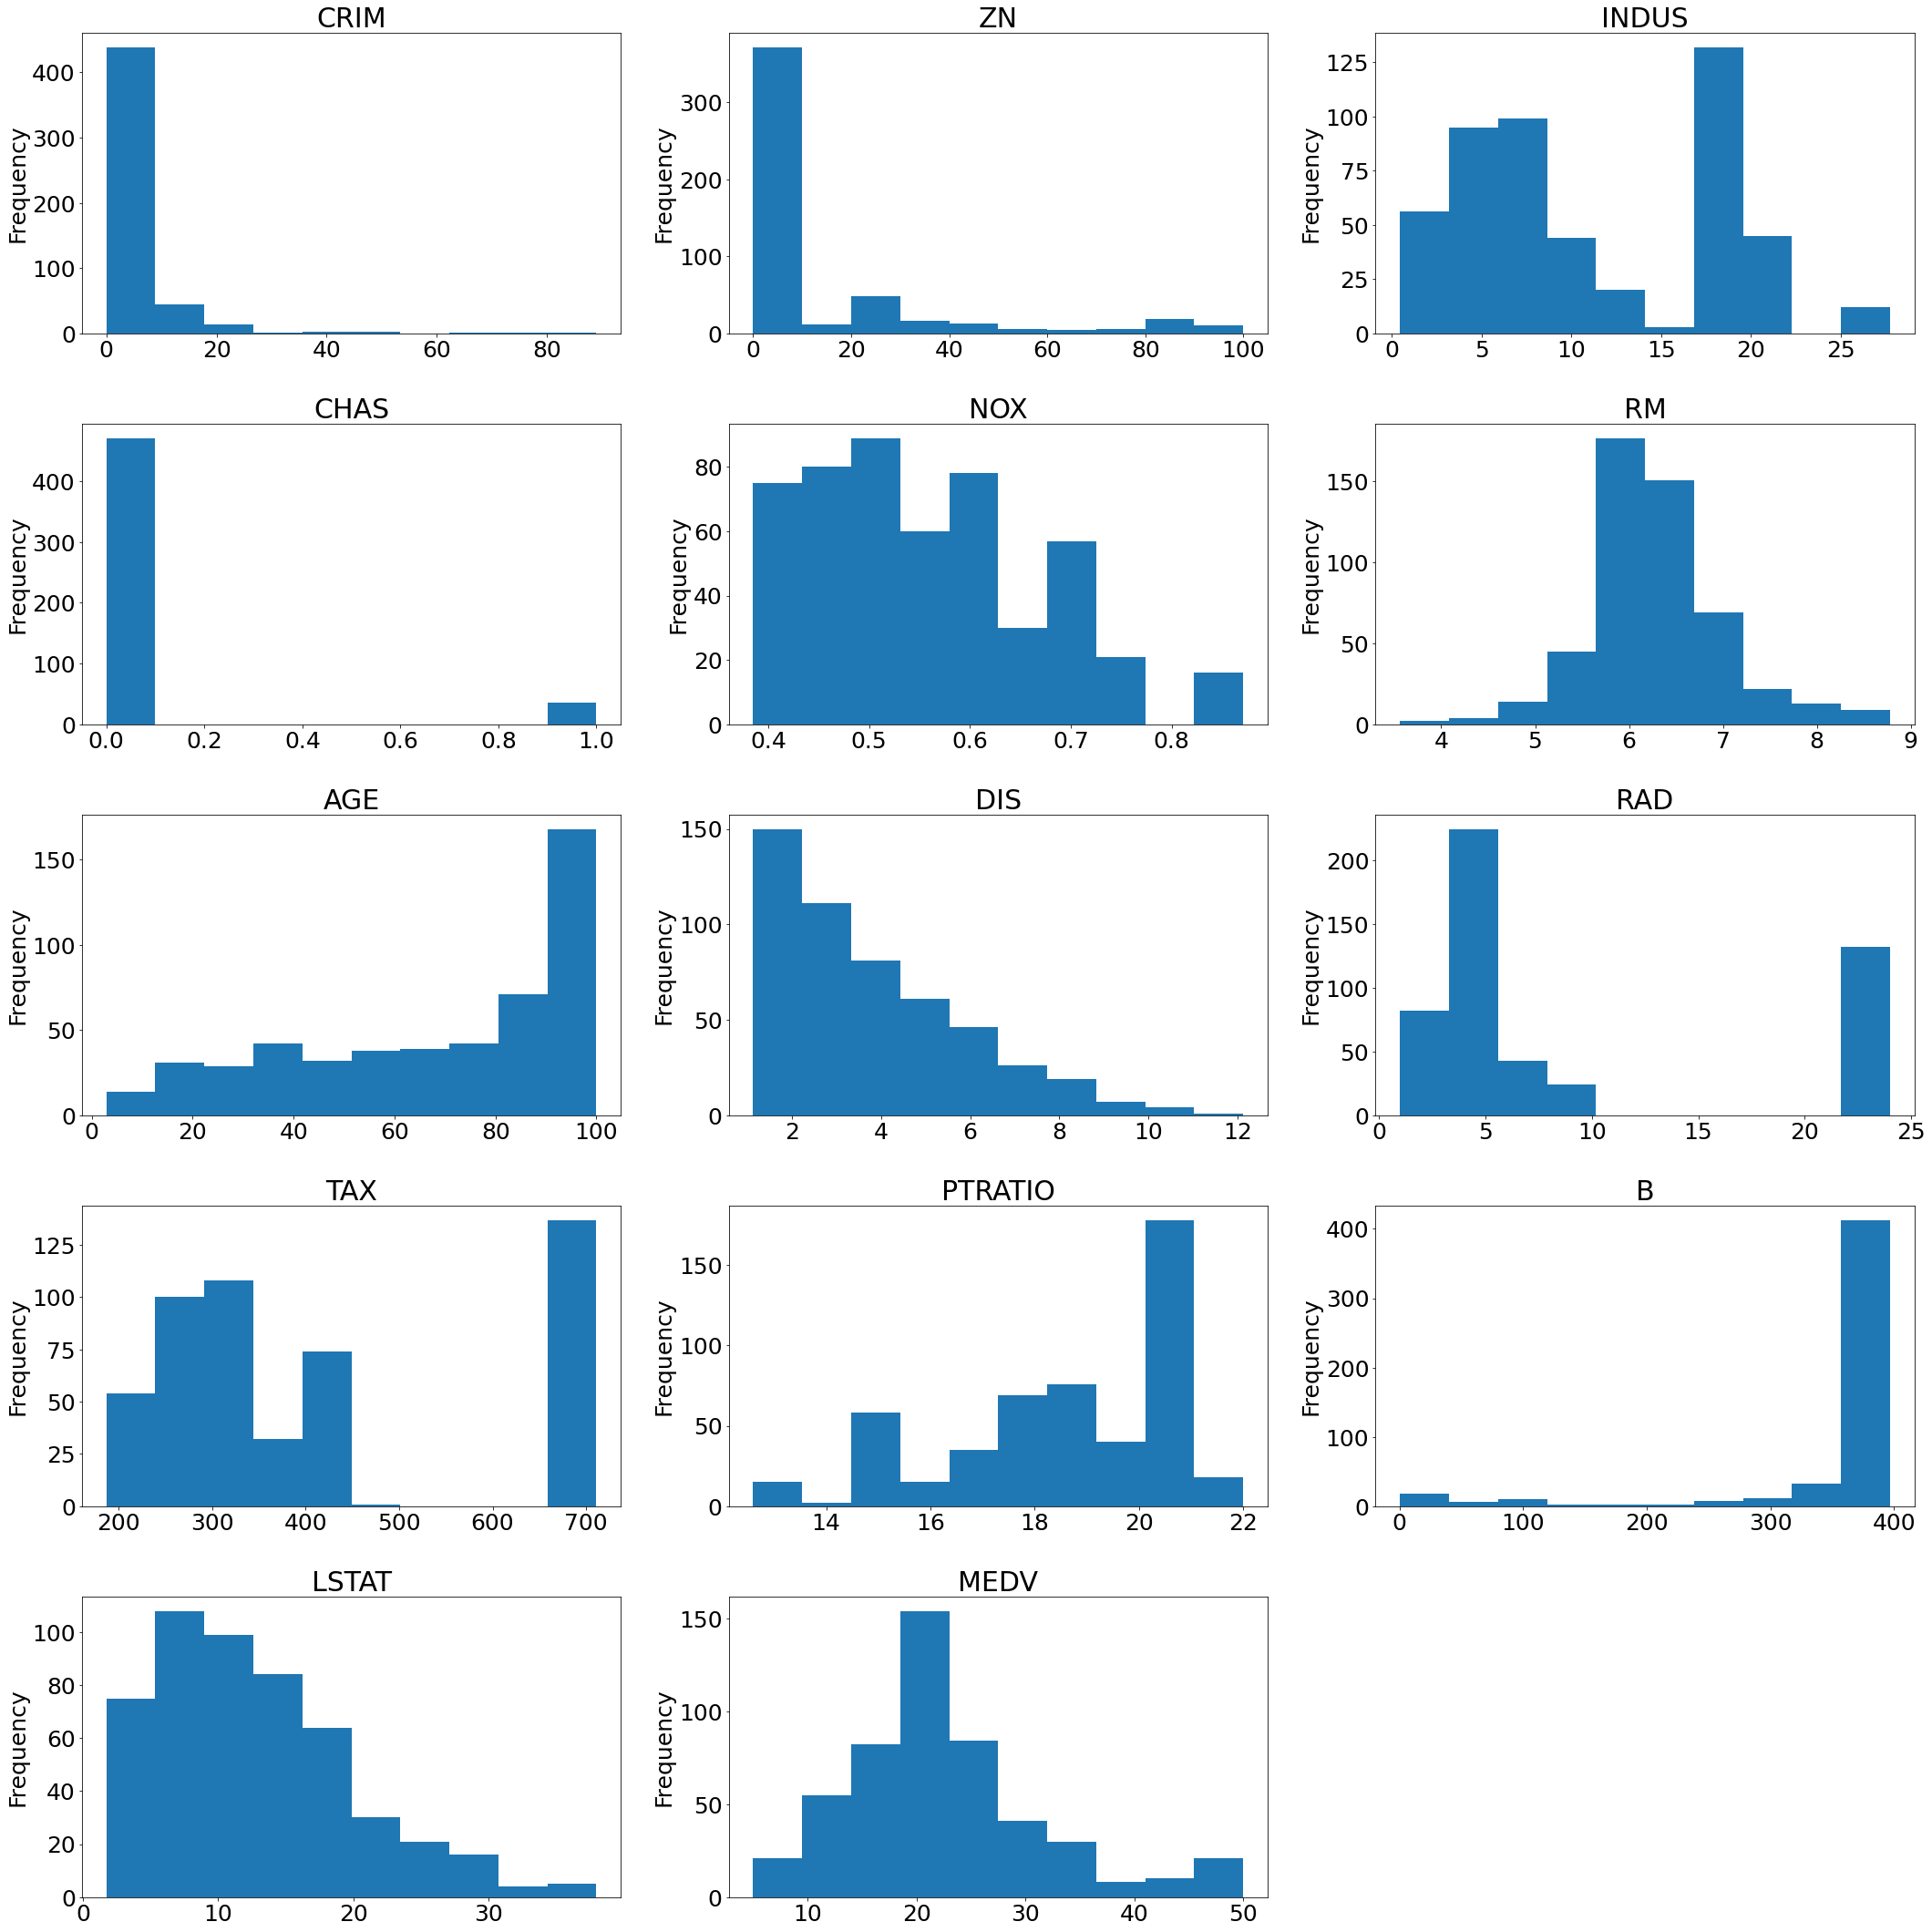

In [4]:
# data distribution
plt.figure(figsize=(30,30))
for i in range(len(df.columns)):
    plt.rc('font', size=25)
    plt.subplot(5,3,i+1)
    df[df.columns[i]].plot.hist()
    plt.title(f'{df.columns[i]}')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [5]:
# CHAS -> binary data(이진 데이터)
# CHAS를 제외한 나머지 데이터 -> continuous data(연속형 데이터)

## Feature importance

In [6]:
# dataset
x = boston.data
y = boston.target

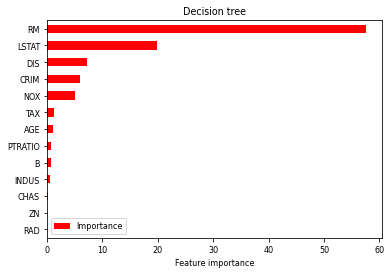

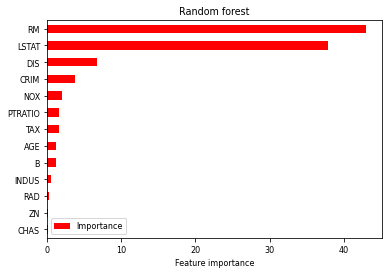

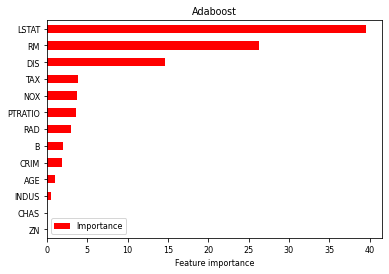

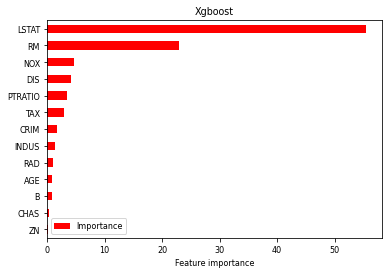

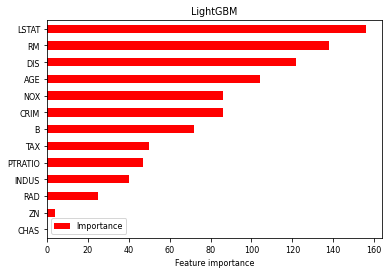

In [7]:
Tree = TreeModel(x, y, boston.feature_names, seed)
Tree.tree_model()
Tree.rf_model()
Tree.adabst_model()
Tree.xgb_model()
Tree.lgbm_model()

## Data preprocessing

In [8]:
# PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

n = np.argmax(cumsum >= 0.95) + 1
print(n)

[0.80582318 0.96887514 0.99022375 0.99718074 0.99848069 0.99920791
 0.99962696 0.9998755  0.99996089 0.9999917  0.99999835 0.99999992
 1.        ]
2


In [9]:
x_minmax = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_minmax[:,i] = prepro(x[:,i], 'minmax')

x_stand = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_stand[:,i] = prepro(x[:,i], 'stand')

x_robust = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_robust[:,i] = prepro(x[:,i], 'robust')

x_maxabs = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_maxabs[:,i] = prepro(x[:,i], 'maxabs')

x_pca_2 = pca_data(x, 2)
x_pca_3 = pca_data(x, 3)

print(x_minmax.shape)
print(x_stand.shape)
print(x_robust.shape)
print(x_maxabs.shape)
print(x_pca_2.shape)
print(x_pca_3.shape)

(506, 13)
(506, 13)
(506, 13)
(506, 13)
(506, 2)
(506, 3)


## Hyperparameter tuning

### Grid search / Random search

In [10]:
minmax = BestModel(x_minmax, y, 'random')
stand = BestModel(x_stand, y, 'random')
robust = BestModel(x_robust, y, 'random')
maxabs = BestModel(x_maxabs, y, 'random')
pca2 = BestModel(x_pca_2, y, 'random')
pca3 = BestModel(x_pca_3, y, 'random')

In [11]:
minmax_model, minmax_param = minmax.best_model()
stand_model, stand_param = stand.best_model()
robust_model, robust_param = robust.best_model()
maxabs_model, maxabs_param = maxabs.best_model()
pca2_model, pca2_param = pca2.best_model_pca2()
pca3_model, pca3_param = pca3.best_model_pca3()

Train on 404 samples
Epoch 1/10
404/404 - 1s - loss: 279.6244 - mse: 279.6243
Epoch 2/10
404/404 - 0s - loss: 161.7461 - mse: 161.7461
Epoch 3/10
404/404 - 1s - loss: 150.2657 - mse: 150.2657
Epoch 4/10
404/404 - 0s - loss: 130.0040 - mse: 130.0040
Epoch 5/10
404/404 - 0s - loss: 124.6465 - mse: 124.6464
Epoch 6/10
404/404 - 0s - loss: 124.3266 - mse: 124.3265
Epoch 7/10
404/404 - 0s - loss: 99.7637 - mse: 99.7637
Epoch 8/10
404/404 - 0s - loss: 97.6151 - mse: 97.6151
Epoch 9/10
404/404 - 0s - loss: 96.7584 - mse: 96.7584
Epoch 10/10
404/404 - 0s - loss: 109.7838 - mse: 109.7838
102/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 223.0833 - mse: 223.0834
Epoch 2/10
405/405 - 1s - loss: 139.1009 - mse: 139.1009
Epoch 3/10
405/405 - 0s - loss: 125.3452 - mse: 125.3452
Epoch 4/10
405/405 - 0s - loss: 122.4689 - mse: 122.4689
Epoch 5/10
405/405 - 0s - loss: 101.9017 - mse: 101.9017
Epoch 6/10
405/405 - 0s - loss: 99.5442 - mse: 99.5442
Epoch 7/10
405/405 - 0s - loss: 117.2237 - mse: 117.2236
Epoch 8/10
405/405 - 0s - loss: 95.1823 - mse: 95.1823
Epoch 9/10
405/405 - 1s - loss: 93.1254 - mse: 93.1255
Epoch 10/10
405/405 - 1s - loss: 95.7103 - mse: 95.7103
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 16/50
404/404 - 0s - loss: 577.2413 - mse: 577.2413
Epoch 17/50
404/404 - 0s - loss: 573.4161 - mse: 573.4161
Epoch 18/50
404/404 - 0s - loss: 574.0623 - mse: 574.0623
Epoch 19/50
404/404 - 0s - loss: 577.7256 - mse: 577.7256
Epoch 20/50
404/404 - 0s - loss: 573.9703 - mse: 573.9703
Epoch 21/50
404/404 - 0s - loss: 577.4310 - mse: 577.4310
Epoch 22/50
404/404 - 0s - loss: 574.8312 - mse: 574.8312
Epoch 23/50
404/404 - 0s - loss: 569.2083 - mse: 569.2084
Epoch 24/50
404/404 - 0s - loss: 571.9658 - mse: 571.9659
Epoch 25/50
404/404 - 0s - loss: 573.6729 - mse: 573.6730
Epoch 26/50
404/404 - 0s - loss: 569.8223 - mse: 569.8223
Epoch 27/50
404/404 - 0s - loss: 570.1808 - mse: 570.1809
Epoch 28/50
404/404 - 0s - loss: 572.2108 - mse: 572.2108
Epoch 29/50
404/404 - 0s - loss: 564.2271 - mse: 564.2271
Epoch 30/50
404/404 - 0s - loss: 567.9410 - mse: 567.9409
Epoch 31/50
404/404 - 0s - loss: 569.3233 - mse: 569.3233
Epoch 32/50
404/404 - 0s - loss: 566.8824 - mse: 566.8824
Epoch 33/50
40

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 552.7181 - mse: 552.7181
Epoch 2/50
405/405 - 0s - loss: 554.1784 - mse: 554.1784
Epoch 3/50
405/405 - 0s - loss: 550.9605 - mse: 550.9605
Epoch 4/50
405/405 - 0s - loss: 551.7529 - mse: 551.7529
Epoch 5/50
405/405 - 0s - loss: 553.1135 - mse: 553.1135
Epoch 6/50
405/405 - 0s - loss: 549.6831 - mse: 549.6830
Epoch 7/50
405/405 - 0s - loss: 547.9000 - mse: 547.8999
Epoch 8/50
405/405 - 0s - loss: 550.4075 - mse: 550.4075
Epoch 9/50
405/405 - 0s - loss: 548.6512 - mse: 548.6512
Epoch 10/50
405/405 - 0s - loss: 548.1999 - mse: 548.2000
Epoch 11/50
405/405 - 0s - loss: 551.0849 - mse: 551.0850
Epoch 12/50
405/405 - 0s - loss: 547.6426 - mse: 547.6426
Epoch 13/50
405/405 - 0s - loss: 547.9374 - mse: 547.9374
Epoch 14/50
405/405 - 0s - loss: 548.8835 - mse: 548.8835
Epoch 15/50
405/405 - 0s - loss: 547.8595 - mse: 547.8596
Epoch 16/50
405/405 - 0s - loss: 547.5864 - mse: 547.5864
Epoch 17/50
405/405 - 0s - loss: 544.9863 - mse: 544.9863
Ep

Epoch 39/50
405/405 - 0s - loss: 607.3019 - mse: 607.3019
Epoch 40/50
405/405 - 0s - loss: 607.7120 - mse: 607.7120
Epoch 41/50
405/405 - 0s - loss: 607.0213 - mse: 607.0214
Epoch 42/50
405/405 - 0s - loss: 603.0891 - mse: 603.0892
Epoch 43/50
405/405 - 0s - loss: 604.8544 - mse: 604.8544
Epoch 44/50
405/405 - 0s - loss: 603.0939 - mse: 603.0939
Epoch 45/50
405/405 - 0s - loss: 604.9030 - mse: 604.9030
Epoch 46/50
405/405 - 0s - loss: 604.7787 - mse: 604.7787
Epoch 47/50
405/405 - 0s - loss: 605.5047 - mse: 605.5047
Epoch 48/50
405/405 - 0s - loss: 603.0586 - mse: 603.0586
Epoch 49/50
405/405 - 0s - loss: 601.2743 - mse: 601.2743
Epoch 50/50
405/405 - 0s - loss: 602.7763 - mse: 602.7763
101/1 [=========================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/30
404/404 - 0s - loss: 512.1476 - mse: 512.1476
Epoch 2/30
404/404 - 0s - loss: 330.4229 - mse: 330.4229
Epoch 3/30
404/404 - 0s - loss: 197.4983 - mse: 197.4983
Epoch 4/30
404/404 - 0s - loss: 145.2670 - mse: 145.2670
Epoch 5/30
404/404 - 0s - loss: 134.6475 - mse: 134.6475
Epoch 6/30
404/404 - 0s - loss: 127.9644 - mse: 127.9644
Epoch 7/30
404/404 - 0s - loss: 110.7046 - mse: 110.7046
Epoch 8/30
404/404 - 0s - loss: 110.6607 - mse: 110.6607
Epoch 9/30
404/404 - 0s - loss: 89.2821 - mse: 89.2821
Epoch 10/30
404/404 - 0s - loss: 87.6276 - mse: 87.6276
Epoch 11/30
404/404 - 0s - loss: 86.1382 - mse: 86.1382
Epoch 12/30
404/404 - 0s - loss: 77.7087 - mse: 77.7087
Epoch 13/30
404/404 - 0s - loss: 78.4289 - mse: 78.4289
Epoch 14/30
404/404 - 0s - loss: 72.2680 - mse: 72.2680
Epoch 15/30
404/404 - 0s - loss: 67.1252 - mse: 67.1252
Epoch 16/30
404/404 - 0s - loss: 61.6407 - mse: 61.6407
Epoch 17/30
404/404 - 0s - loss: 72.8218 - mse: 72.8218
Epoch 18/30
404/404 

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 375.3700 - mse: 375.3700
Epoch 2/30
405/405 - 0s - loss: 220.3807 - mse: 220.3808
Epoch 3/30
405/405 - 0s - loss: 142.0516 - mse: 142.0516
Epoch 4/30
405/405 - 0s - loss: 111.2537 - mse: 111.2537
Epoch 5/30
405/405 - 0s - loss: 100.8112 - mse: 100.8112
Epoch 6/30
405/405 - 0s - loss: 87.1315 - mse: 87.1315
Epoch 7/30
405/405 - 0s - loss: 87.8194 - mse: 87.8194
Epoch 8/30
405/405 - 0s - loss: 82.2980 - mse: 82.2980
Epoch 9/30
405/405 - 0s - loss: 77.7834 - mse: 77.7834
Epoch 10/30
405/405 - 0s - loss: 68.9923 - mse: 68.9923
Epoch 11/30
405/405 - 0s - loss: 61.7319 - mse: 61.7319
Epoch 12/30
405/405 - 0s - loss: 69.5030 - mse: 69.5030
Epoch 13/30
405/405 - 0s - loss: 68.2457 - mse: 68.2457
Epoch 14/30
405/405 - 0s - loss: 60.2839 - mse: 60.2839
Epoch 15/30
405/405 - 0s - loss: 63.6653 - mse: 63.6653
Epoch 16/30
405/405 - 0s - loss: 60.0017 - mse: 60.0017
Epoch 17/30
405/405 - 0s - loss: 57.5719 - mse: 57.5719
Epoch 18/30
405/405 - 0s -

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 486.4281 - mse: 486.4282
Epoch 2/30
405/405 - 0s - loss: 311.3316 - mse: 311.3316
Epoch 3/30
405/405 - 0s - loss: 206.0623 - mse: 206.0623
Epoch 4/30
405/405 - 0s - loss: 142.5401 - mse: 142.5401
Epoch 5/30
405/405 - 0s - loss: 129.8469 - mse: 129.8469
Epoch 6/30
405/405 - 0s - loss: 130.1434 - mse: 130.1434
Epoch 7/30
405/405 - 0s - loss: 127.8365 - mse: 127.8365
Epoch 8/30
405/405 - 0s - loss: 115.9907 - mse: 115.9907
Epoch 9/30
405/405 - 0s - loss: 103.4008 - mse: 103.4008
Epoch 10/30
405/405 - 0s - loss: 106.0141 - mse: 106.0141
Epoch 11/30
405/405 - 0s - loss: 90.7896 - mse: 90.7896
Epoch 12/30
405/405 - 0s - loss: 93.1873 - mse: 93.1873
Epoch 13/30
405/405 - 0s - loss: 86.0303 - mse: 86.0303
Epoch 14/30
405/405 - 0s - loss: 81.7227 - mse: 81.7227
Epoch 15/30
405/405 - 0s - loss: 83.3111 - mse: 83.3111
Epoch 16/30
405/405 - 0s - loss: 72.3387 - mse: 72.3386
Epoch 17/30
405/405 - 0s - loss: 69.4261 - mse: 69.4261
Epoch 18/30
405/

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 237.8893 - mse: 237.8893
Epoch 2/10
405/405 - 0s - loss: 105.4715 - mse: 105.4716
Epoch 3/10
405/405 - 0s - loss: 82.4317 - mse: 82.4317
Epoch 4/10
405/405 - 0s - loss: 75.6681 - mse: 75.6681
Epoch 5/10
405/405 - 0s - loss: 76.1317 - mse: 76.1317
Epoch 6/10
405/405 - 0s - loss: 63.6986 - mse: 63.6987
Epoch 7/10
405/405 - 0s - loss: 61.4674 - mse: 61.4674
Epoch 8/10
405/405 - 0s - loss: 58.6439 - mse: 58.6439
Epoch 9/10
405/405 - 0s - loss: 61.8416 - mse: 61.8416
Epoch 10/10
405/405 - 0s - loss: 56.5294 - mse: 56.5294
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 250.0964 - mse: 250.0964
Epoch 2/10
405/405 - 0s - loss: 128.1027 - mse: 128.1027
Epoch 3/10
405/405 - 0s - loss: 96.2911 - mse: 96.2911
Epoch 4/10
405/405 - 0s - loss: 89.1710 - mse: 89.1710
Epoch 5/10
405/405 - 0s - loss: 69.3609 - mse: 69.3609
Epoch 6/10
405/405 - 0s - loss: 66.4003 - mse: 66.4003
Epoch 7/10
405/405 - 0s - loss: 67.3778 - mse: 67.3778
Epoch 8/10
405/405 - 0s - loss: 56.7258 - mse: 56.7258
Epoch 9/10
405/405 - 0s - loss: 65.3465 - mse: 65.3465
Epoch 10/10
405/405 - 0s - loss: 60.7578 - mse: 60.7578
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 261.8548 - mse: 261.8548
Epoch 2/50
405/405 - 0s - loss: 148.1838 - mse: 148.1838
Epoch 3/50
405/405 - 0s - loss: 121.3182 - mse: 121.3182
Epoch 4/50
405/405 - 0s - loss: 116.8159 - mse: 116.8159
Epoch 5/50
405/405 - 0s - loss: 110.0789 - mse: 110.0789
Epoch 6/50
405/405 - 0s - loss: 100.4660 - mse: 100.4660
Epoch 7/50
405/405 - 0s - loss: 96.0471 - mse: 96.0471
Epoch 8/50
405/405 - 0s - loss: 95.5724 - mse: 95.5724
Epoch 9/50
405/405 - 0s - loss: 91.2713 - mse: 91.2713
Epoch 10/50
405/405 - 0s - loss: 85.6333 - mse: 85.6333
Epoch 11/50
405/405 - 0s - loss: 91.6516 - mse: 91.6516
Epoch 12/50
405/405 - 0s - loss: 79.2714 - mse: 79.2714
Epoch 13/50
405/405 - 0s - loss: 81.3658 - mse: 81.3658
Epoch 14/50
405/405 - 0s - loss: 77.0273 - mse: 77.0274
Epoch 15/50
405/405 - 0s - loss: 85.2949 - mse: 85.2949
Epoch 16/50
405/405 - 0s - loss: 83.3522 - mse: 83.3522
Epoch 17/50
405/405 - 0s - loss: 82.8977 - mse: 82.8978
Epoch 18/50
405/405 - 0s

Epoch 42/50
405/405 - 0s - loss: 66.0637 - mse: 66.0637
Epoch 43/50
405/405 - 0s - loss: 57.7025 - mse: 57.7025
Epoch 44/50
405/405 - 0s - loss: 60.3075 - mse: 60.3075
Epoch 45/50
405/405 - 0s - loss: 59.9855 - mse: 59.9855
Epoch 46/50
405/405 - 0s - loss: 52.6625 - mse: 52.6625
Epoch 47/50
405/405 - 0s - loss: 50.9103 - mse: 50.9103
Epoch 48/50
405/405 - 0s - loss: 59.2680 - mse: 59.2680
Epoch 49/50
405/405 - 0s - loss: 46.1168 - mse: 46.1168
Epoch 50/50
405/405 - 0s - loss: 51.0929 - mse: 51.0929
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 331.0949 - mse: 331.0949
Epoch 2/50
405/405 - 0s - loss: 178.2994 - mse: 178.2994
Epoch 3/50
405/405 - 0s - loss: 157.3775 - mse: 157.3775
Epoch 4/50
405/405 - 0s - loss: 150.7756 - mse: 150.7756
Epoch 5/50
405/405 - 0s - loss: 146.5040 - mse: 146.5040
Epoch 6/50
405/405 - 0s - loss: 122.7464 - mse: 122.7464
Epoch 7/50
405/405 - 0s - loss: 140.0357 - mse: 140.0356
Epoch 8/50
405/405 - 0s - loss: 130.3150 - mse: 130.3150
Epoch 9/50
405/405 - 0s - loss: 127.1366 - mse: 127.1366
Epoch 10/50
405/405 - 0s - loss: 123.6589 - mse: 123.6589
Epoch 11/50
405/405 - 0s - loss: 116.7287 - mse: 116.7288
Epoch 12/50
405/405 - 0s - loss: 102.3971 - mse: 102.3971
Epoch 13/50
405/405 - 0s - loss: 96.8486 - mse: 96.8486
Epoch 14/50
405/405 - 0s - loss: 103.7917 - mse: 103.7918
Epoch 15/50
405/405 - 0s - loss: 112.5709 - mse: 112.5709
Epoch 16/50
405/405 - 0s - loss: 95.8331 - mse: 95.8331
Epoch 17/50
405/405 - 0s - loss: 88.5773 - mse: 88.5773
Epoch 18

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 567.0271 - mse: 567.0273
Epoch 2/30
405/405 - 0s - loss: 561.3742 - mse: 561.3741
Epoch 3/30
405/405 - 0s - loss: 556.6182 - mse: 556.6182
Epoch 4/30
405/405 - 0s - loss: 558.2590 - mse: 558.2591
Epoch 5/30
405/405 - 0s - loss: 562.4407 - mse: 562.4406
Epoch 6/30
405/405 - 0s - loss: 557.7562 - mse: 557.7562
Epoch 7/30
405/405 - 0s - loss: 553.7590 - mse: 553.7590
Epoch 8/30
405/405 - 0s - loss: 558.8139 - mse: 558.8139
Epoch 9/30
405/405 - 0s - loss: 551.4427 - mse: 551.4427
Epoch 10/30
405/405 - 0s - loss: 555.4693 - mse: 555.4692
Epoch 11/30
405/405 - 0s - loss: 555.1680 - mse: 555.1680
Epoch 12/30
405/405 - 0s - loss: 550.4536 - mse: 550.4536
Epoch 13/30
405/405 - 0s - loss: 549.7637 - mse: 549.7635
Epoch 14/30
405/405 - 0s - loss: 544.8714 - mse: 544.8714
Epoch 15/30
405/405 - 0s - loss: 548.3325 - mse: 548.3325
Epoch 16/30
405/405 - 0s - loss: 548.5648 - mse: 548.5648
Epoch 17/30
405/405 - 0s - loss: 552.1580 - mse: 552.1580
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 683.4606 - mse: 683.4606
Epoch 2/30
405/405 - 0s - loss: 683.8722 - mse: 683.8724
Epoch 3/30
405/405 - 0s - loss: 679.0005 - mse: 679.0005
Epoch 4/30
405/405 - 0s - loss: 675.5332 - mse: 675.5332
Epoch 5/30
405/405 - 0s - loss: 678.2845 - mse: 678.2845
Epoch 6/30
405/405 - 0s - loss: 678.1810 - mse: 678.1810
Epoch 7/30
405/405 - 0s - loss: 676.5823 - mse: 676.5823
Epoch 8/30
405/405 - 0s - loss: 672.8366 - mse: 672.8367
Epoch 9/30
405/405 - 0s - loss: 670.7122 - mse: 670.7123
Epoch 10/30
405/405 - 0s - loss: 668.6197 - mse: 668.6197
Epoch 11/30
405/405 - 0s - loss: 673.5591 - mse: 673.5590
Epoch 12/30
405/405 - 0s - loss: 668.3428 - mse: 668.3429
Epoch 13/30
405/405 - 0s - loss: 669.4804 - mse: 669.4805
Epoch 14/30
405/405 - 0s - loss: 667.3736 - mse: 667.3737
Epoch 15/30
405/405 - 0s - loss: 662.0854 - mse: 662.0855
Epoch 16/30
405/405 - 0s - loss: 663.3418 - mse: 663.3417
Epoch 17/30
405/405 - 0s - loss: 663.9535 - mse: 663.9536
Ep

Train on 404 samples
Epoch 1/50
404/404 - 1s - loss: 609.1690 - mse: 609.1686
Epoch 2/50
404/404 - 0s - loss: 608.0063 - mse: 608.0064
Epoch 3/50
404/404 - 0s - loss: 604.4643 - mse: 604.4642
Epoch 4/50
404/404 - 0s - loss: 602.0501 - mse: 602.0501
Epoch 5/50
404/404 - 0s - loss: 596.0511 - mse: 596.0507
Epoch 6/50
404/404 - 0s - loss: 594.1075 - mse: 594.1075
Epoch 7/50
404/404 - 0s - loss: 588.4432 - mse: 588.4432
Epoch 8/50
404/404 - 0s - loss: 585.4601 - mse: 585.4600
Epoch 9/50
404/404 - 0s - loss: 584.1960 - mse: 584.1959
Epoch 10/50
404/404 - 1s - loss: 580.0278 - mse: 580.0277
Epoch 11/50
404/404 - 0s - loss: 575.0044 - mse: 575.0044
Epoch 12/50
404/404 - 0s - loss: 571.6493 - mse: 571.6495
Epoch 13/50
404/404 - 0s - loss: 570.4455 - mse: 570.4456
Epoch 14/50
404/404 - 0s - loss: 567.8204 - mse: 567.8201
Epoch 15/50
404/404 - 0s - loss: 557.9456 - mse: 557.9457
Epoch 16/50
404/404 - 0s - loss: 557.9492 - mse: 557.9493
Epoch 17/50
404/404 - 0s - loss: 559.7408 - mse: 559.7409
Ep

405/405 - 0s - loss: 414.6583 - mse: 414.6583
Epoch 39/50
405/405 - 0s - loss: 410.7908 - mse: 410.7909
Epoch 40/50
405/405 - 0s - loss: 409.3130 - mse: 409.3130
Epoch 41/50
405/405 - 0s - loss: 407.8145 - mse: 407.8144
Epoch 42/50
405/405 - 0s - loss: 403.6923 - mse: 403.6920
Epoch 43/50
405/405 - 0s - loss: 404.4870 - mse: 404.4871
Epoch 44/50
405/405 - 0s - loss: 397.7115 - mse: 397.7115
Epoch 45/50
405/405 - 0s - loss: 399.4876 - mse: 399.4875
Epoch 46/50
405/405 - 0s - loss: 399.9445 - mse: 399.9445
Epoch 47/50
405/405 - 1s - loss: 394.5350 - mse: 394.5351
Epoch 48/50
405/405 - 1s - loss: 395.0189 - mse: 395.0189
Epoch 49/50
405/405 - 0s - loss: 389.7520 - mse: 389.7519
Epoch 50/50
405/405 - 0s - loss: 387.1426 - mse: 387.1428
101/1 [===========================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 515.2786 - mse: 515.2786
Epoch 2/50
405/405 - 0s - loss: 511.7254 - mse: 511.7255
Epoch 3/50
405/405 - 0s - loss: 507.3044 - mse: 507.3044
Epoch 4/50
405/405 - 0s - loss: 505.5914 - mse: 505.5915
Epoch 5/50
405/405 - 0s - loss: 500.1577 - mse: 500.1579
Epoch 6/50
405/405 - 0s - loss: 491.9407 - mse: 491.9412
Epoch 7/50
405/405 - 0s - loss: 489.1207 - mse: 489.1208
Epoch 8/50
405/405 - 0s - loss: 484.3629 - mse: 484.3628
Epoch 9/50
405/405 - 0s - loss: 478.1703 - mse: 478.1701
Epoch 10/50
405/405 - 0s - loss: 477.4966 - mse: 477.4965
Epoch 11/50
405/405 - 0s - loss: 464.4848 - mse: 464.4846
Epoch 12/50
405/405 - 0s - loss: 466.4861 - mse: 466.4861
Epoch 13/50
405/405 - 0s - loss: 465.3083 - mse: 465.3084
Epoch 14/50
405/405 - 0s - loss: 460.2938 - mse: 460.2937
Epoch 15/50
405/405 - 0s - loss: 450.7381 - mse: 450.7380
Epoch 16/50
405/405 - 0s - loss: 449.5500 - mse: 449.5499
Epoch 17/50
405/405 - 0s - loss: 446.3156 - mse: 446.3156
Ep

Epoch 39/50
405/405 - 1s - loss: 482.1983 - mse: 482.1981
Epoch 40/50
405/405 - 0s - loss: 476.8401 - mse: 476.8402
Epoch 41/50
405/405 - 0s - loss: 478.9553 - mse: 478.9554
Epoch 42/50
405/405 - 0s - loss: 472.1580 - mse: 472.1578
Epoch 43/50
405/405 - 0s - loss: 466.2335 - mse: 466.2334
Epoch 44/50
405/405 - 0s - loss: 461.8160 - mse: 461.8160
Epoch 45/50
405/405 - 0s - loss: 464.0604 - mse: 464.0602
Epoch 46/50
405/405 - 1s - loss: 455.3961 - mse: 455.3961
Epoch 47/50
405/405 - 0s - loss: 455.9874 - mse: 455.9874
Epoch 48/50
405/405 - 0s - loss: 447.8923 - mse: 447.8922
Epoch 49/50
405/405 - 0s - loss: 448.2352 - mse: 448.2353
Epoch 50/50
405/405 - 0s - loss: 438.8061 - mse: 438.8058
101/1 [=========================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 611.6428 - mse: 611.6428
Epoch 2/50
405/405 - 0s - loss: 611.6025 - mse: 611.6024
Epoch 3/50
405/405 - 0s - loss: 610.1960 - mse: 610.1959
Epoch 4/50
405/405 - 0s - loss: 605.7791 - mse: 605.7791
Epoch 5/50
405/405 - 0s - loss: 601.8771 - mse: 601.8771
Epoch 6/50
405/405 - 0s - loss: 604.2789 - mse: 604.2788
Epoch 7/50
405/405 - 0s - loss: 605.2169 - mse: 605.2169
Epoch 8/50
405/405 - 0s - loss: 607.8385 - mse: 607.8386
Epoch 9/50
405/405 - 0s - loss: 602.2188 - mse: 602.2188
Epoch 10/50
405/405 - 0s - loss: 601.8608 - mse: 601.8607
Epoch 11/50
405/405 - 0s - loss: 601.2403 - mse: 601.2403
Epoch 12/50
405/405 - 0s - loss: 603.9183 - mse: 603.9183
Epoch 13/50
405/405 - 0s - loss: 595.1779 - mse: 595.1779
Epoch 14/50
405/405 - 0s - loss: 596.6558 - mse: 596.6558
Epoch 15/50
405/405 - 0s - loss: 596.2179 - mse: 596.2180
Epoch 16/50
405/405 - 0s - loss: 592.5340 - mse: 592.5341
Epoch 17/50
405/405 - 0s - loss: 594.0822 - mse: 594.0822
Ep

Epoch 39/50
405/405 - 0s - loss: 458.6934 - mse: 458.6935
Epoch 40/50
405/405 - 0s - loss: 457.4390 - mse: 457.4390
Epoch 41/50
405/405 - 0s - loss: 455.3331 - mse: 455.3330
Epoch 42/50
405/405 - 0s - loss: 456.6720 - mse: 456.6721
Epoch 43/50
405/405 - 0s - loss: 454.9411 - mse: 454.9411
Epoch 44/50
405/405 - 0s - loss: 456.3065 - mse: 456.3065
Epoch 45/50
405/405 - 0s - loss: 455.3318 - mse: 455.3318
Epoch 46/50
405/405 - 0s - loss: 452.7177 - mse: 452.7178
Epoch 47/50
405/405 - 0s - loss: 447.3057 - mse: 447.3057
Epoch 48/50
405/405 - 0s - loss: 451.3957 - mse: 451.3958
Epoch 49/50
405/405 - 0s - loss: 446.5165 - mse: 446.5165
Epoch 50/50
405/405 - 0s - loss: 441.8311 - mse: 441.8311
101/1 [=========================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 730.3332 - mse: 730.3333
Epoch 2/50
405/405 - 0s - loss: 726.8103 - mse: 726.8104
Epoch 3/50
405/405 - 0s - loss: 727.2840 - mse: 727.2841
Epoch 4/50
405/405 - 0s - loss: 724.5486 - mse: 724.5486
Epoch 5/50
405/405 - 0s - loss: 726.4158 - mse: 726.4160
Epoch 6/50
405/405 - 0s - loss: 718.8158 - mse: 718.8159
Epoch 7/50
405/405 - 0s - loss: 718.7234 - mse: 718.7234
Epoch 8/50
405/405 - 0s - loss: 723.4225 - mse: 723.4224
Epoch 9/50
405/405 - 0s - loss: 717.0757 - mse: 717.0759
Epoch 10/50
405/405 - 0s - loss: 712.0499 - mse: 712.0499
Epoch 11/50
405/405 - 0s - loss: 713.1712 - mse: 713.1711
Epoch 12/50
405/405 - 0s - loss: 714.4217 - mse: 714.4216
Epoch 13/50
405/405 - 0s - loss: 710.9250 - mse: 710.9250
Epoch 14/50
405/405 - 0s - loss: 708.1909 - mse: 708.1909
Epoch 15/50
405/405 - 0s - loss: 709.3664 - mse: 709.3663
Epoch 16/50
405/405 - 0s - loss: 708.6275 - mse: 708.6276
Epoch 17/50
405/405 - 0s - loss: 703.7917 - mse: 703.7917
Ep

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 536.8583 - mse: 536.8583
Epoch 2/30
405/405 - 0s - loss: 536.5519 - mse: 536.5519
Epoch 3/30
405/405 - 0s - loss: 527.5186 - mse: 527.5186
Epoch 4/30
405/405 - 0s - loss: 530.6859 - mse: 530.6859
Epoch 5/30
405/405 - 0s - loss: 514.0964 - mse: 514.0964
Epoch 6/30
405/405 - 0s - loss: 530.0510 - mse: 530.0510
Epoch 7/30
405/405 - 0s - loss: 534.3672 - mse: 534.3672
Epoch 8/30
405/405 - 0s - loss: 522.2241 - mse: 522.2241
Epoch 9/30
405/405 - 0s - loss: 530.1948 - mse: 530.1948
Epoch 10/30
405/405 - 0s - loss: 527.8450 - mse: 527.8450
Epoch 11/30
405/405 - 0s - loss: 526.8116 - mse: 526.8116
Epoch 12/30
405/405 - 0s - loss: 534.6876 - mse: 534.6876
Epoch 13/30
405/405 - 0s - loss: 527.8115 - mse: 527.8115
Epoch 14/30
405/405 - 0s - loss: 521.9043 - mse: 521.9043
Epoch 15/30
405/405 - 0s - loss: 531.0203 - mse: 531.0203
Epoch 16/30
405/405 - 0s - loss: 533.3493 - mse: 533.3493
Epoch 17/30
405/405 - 0s - loss: 535.7859 - mse: 535.7859
Ep

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 568.8962 - mse: 568.8962
Epoch 2/30
405/405 - 0s - loss: 572.9046 - mse: 572.9046
Epoch 3/30
405/405 - 0s - loss: 573.6983 - mse: 573.6982
Epoch 4/30
405/405 - 0s - loss: 574.4842 - mse: 574.4842
Epoch 5/30
405/405 - 0s - loss: 571.3483 - mse: 571.3483
Epoch 6/30
405/405 - 0s - loss: 584.2764 - mse: 584.2764
Epoch 7/30
405/405 - 0s - loss: 573.3587 - mse: 573.3587
Epoch 8/30
405/405 - 0s - loss: 566.2495 - mse: 566.2495
Epoch 9/30
405/405 - 0s - loss: 573.2759 - mse: 573.2759
Epoch 10/30
405/405 - 0s - loss: 570.8639 - mse: 570.8639
Epoch 11/30
405/405 - 0s - loss: 573.6738 - mse: 573.6738
Epoch 12/30
405/405 - 0s - loss: 567.4025 - mse: 567.4024
Epoch 13/30
405/405 - 0s - loss: 576.8751 - mse: 576.8751
Epoch 14/30
405/405 - 0s - loss: 567.0930 - mse: 567.0930
Epoch 15/30
405/405 - 0s - loss: 575.4743 - mse: 575.4742
Epoch 16/30
405/405 - 0s - loss: 568.8487 - mse: 568.8486
Epoch 17/30
405/405 - 0s - loss: 575.8630 - mse: 575.8630
Ep

Train on 404 samples
Epoch 1/50
404/404 - 1s - loss: 515.9739 - mse: 515.9739
Epoch 2/50
404/404 - 0s - loss: 395.6341 - mse: 395.6341
Epoch 3/50
404/404 - 0s - loss: 366.5095 - mse: 366.5096
Epoch 4/50
404/404 - 0s - loss: 352.6790 - mse: 352.6790
Epoch 5/50
404/404 - 0s - loss: 339.1751 - mse: 339.1751
Epoch 6/50
404/404 - 0s - loss: 329.6903 - mse: 329.6903
Epoch 7/50
404/404 - 0s - loss: 320.4448 - mse: 320.4449
Epoch 8/50
404/404 - 0s - loss: 311.1680 - mse: 311.1679
Epoch 9/50
404/404 - 0s - loss: 300.9152 - mse: 300.9152
Epoch 10/50
404/404 - 0s - loss: 296.7735 - mse: 296.7735
Epoch 11/50
404/404 - 0s - loss: 292.6739 - mse: 292.6740
Epoch 12/50
404/404 - 0s - loss: 284.4380 - mse: 284.4380
Epoch 13/50
404/404 - 0s - loss: 274.1271 - mse: 274.1271
Epoch 14/50
404/404 - 0s - loss: 269.3311 - mse: 269.3311
Epoch 15/50
404/404 - 0s - loss: 260.5891 - mse: 260.5891
Epoch 16/50
404/404 - 0s - loss: 255.2963 - mse: 255.2963
Epoch 17/50
404/404 - 0s - loss: 252.5150 - mse: 252.5150
Ep

Epoch 40/50
405/405 - 0s - loss: 37.2716 - mse: 37.2716
Epoch 41/50
405/405 - 0s - loss: 34.5996 - mse: 34.5996
Epoch 42/50
405/405 - 0s - loss: 32.4153 - mse: 32.4153
Epoch 43/50
405/405 - 0s - loss: 35.8122 - mse: 35.8122
Epoch 44/50
405/405 - 0s - loss: 32.4426 - mse: 32.4426
Epoch 45/50
405/405 - 0s - loss: 36.4886 - mse: 36.4886
Epoch 46/50
405/405 - 0s - loss: 31.2802 - mse: 31.2802
Epoch 47/50
405/405 - 0s - loss: 33.4531 - mse: 33.4531
Epoch 48/50
405/405 - 0s - loss: 34.1696 - mse: 34.1696
Epoch 49/50
405/405 - 0s - loss: 34.9414 - mse: 34.9414
Epoch 50/50
405/405 - 0s - loss: 29.9638 - mse: 29.9638
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 520.8947 - mse: 520.8947
Epoch 2/50
405/405 - 0s - loss: 325.8322 - mse: 325.8322
Epoch 3/50
405/405 - 0s - loss: 185.0200 - mse: 185.0200
Epoch 4/50
405/405 - 0s - loss: 118.6477 - mse: 118.6477
Epoch 5/50
405/405 - 0s - loss: 110.4970 - mse: 110.4971
Epoch 6/50
405/405 - 0s - loss: 97.6836 - mse: 97.6836
Epoch 7/50
405/405 - 0s - loss: 89.2063 - mse: 89.2063
Epoch 8/50
405/405 - 0s - loss: 78.4937 - mse: 78.4937
Epoch 9/50
405/405 - 0s - loss: 73.6579 - mse: 73.6580
Epoch 10/50
405/405 - 0s - loss: 65.4620 - mse: 65.4620
Epoch 11/50
405/405 - 0s - loss: 56.7772 - mse: 56.7772
Epoch 12/50
405/405 - 0s - loss: 62.8784 - mse: 62.8784
Epoch 13/50
405/405 - 0s - loss: 57.1625 - mse: 57.1625
Epoch 14/50
405/405 - 0s - loss: 51.1434 - mse: 51.1434
Epoch 15/50
405/405 - 0s - loss: 49.5114 - mse: 49.5113
Epoch 16/50
405/405 - 0s - loss: 46.7666 - mse: 46.7666
Epoch 17/50
405/405 - 0s - loss: 47.3916 - mse: 47.3916
Epoch 18/50
405/405 - 0s -

405/405 - 0s - loss: 39.5468 - mse: 39.5468
Epoch 42/50
405/405 - 0s - loss: 36.5323 - mse: 36.5323
Epoch 43/50
405/405 - 0s - loss: 38.9036 - mse: 38.9036
Epoch 44/50
405/405 - 0s - loss: 31.6194 - mse: 31.6194
Epoch 45/50
405/405 - 0s - loss: 39.1214 - mse: 39.1214
Epoch 46/50
405/405 - 0s - loss: 35.8453 - mse: 35.8453
Epoch 47/50
405/405 - 0s - loss: 40.5359 - mse: 40.5359
Epoch 48/50
405/405 - 0s - loss: 39.4086 - mse: 39.4086
Epoch 49/50
405/405 - 0s - loss: 37.0534 - mse: 37.0534
Epoch 50/50
405/405 - 0s - loss: 39.9714 - mse: 39.9714
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 426.5666 - mse: 426.5667
Epoch 2/10
405/405 - 0s - loss: 215.1511 - mse: 215.1511
Epoch 3/10
405/405 - 0s - loss: 112.2857 - mse: 112.2857
Epoch 4/10
405/405 - 0s - loss: 71.6093 - mse: 71.6093
Epoch 5/10
405/405 - 0s - loss: 60.7748 - mse: 60.7748
Epoch 6/10
405/405 - 0s - loss: 59.3972 - mse: 59.3972
Epoch 7/10
405/405 - 0s - loss: 48.4338 - mse: 48.4338
Epoch 8/10
405/405 - 0s - loss: 44.3090 - mse: 44.3090
Epoch 9/10
405/405 - 0s - loss: 39.6512 - mse: 39.6512
Epoch 10/10
405/405 - 0s - loss: 46.2462 - mse: 46.2462
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 493.1198 - mse: 493.1198
Epoch 2/10
405/405 - 0s - loss: 244.1240 - mse: 244.1240
Epoch 3/10
405/405 - 0s - loss: 134.0817 - mse: 134.0817
Epoch 4/10
405/405 - 0s - loss: 99.8352 - mse: 99.8352
Epoch 5/10
405/405 - 0s - loss: 81.6800 - mse: 81.6800
Epoch 6/10
405/405 - 0s - loss: 66.8986 - mse: 66.8986
Epoch 7/10
405/405 - 0s - loss: 53.6635 - mse: 53.6635
Epoch 8/10
405/405 - 0s - loss: 45.1628 - mse: 45.1628
Epoch 9/10
405/405 - 0s - loss: 42.9429 - mse: 42.9429
Epoch 10/10
405/405 - 0s - loss: 43.3143 - mse: 43.3143
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 437.6601 - mse: 437.6601
Epoch 2/10
405/405 - 0s - loss: 320.7070 - mse: 320.7070
Epoch 3/10
405/405 - 0s - loss: 205.3431 - mse: 205.3431
Epoch 4/10
405/405 - 0s - loss: 126.3360 - mse: 126.3360
Epoch 5/10
405/405 - 0s - loss: 86.5071 - mse: 86.5071
Epoch 6/10
405/405 - 0s - loss: 78.1220 - mse: 78.1220
Epoch 7/10
405/405 - 0s - loss: 67.6125 - mse: 67.6125
Epoch 8/10
405/405 - 0s - loss: 66.4983 - mse: 66.4983
Epoch 9/10
405/405 - 0s - loss: 57.4762 - mse: 57.4762
Epoch 10/10
405/405 - 0s - loss: 57.2397 - mse: 57.2397
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/30
404/404 - 1s - loss: 601.4912 - mse: 601.4913
Epoch 2/30
404/404 - 0s - loss: 603.3443 - mse: 603.3444
Epoch 3/30
404/404 - 0s - loss: 608.4080 - mse: 608.4078
Epoch 4/30
404/404 - 0s - loss: 602.7740 - mse: 602.7739
Epoch 5/30
404/404 - 0s - loss: 607.5778 - mse: 607.5779
Epoch 6/30
404/404 - 0s - loss: 608.6496 - mse: 608.6500
Epoch 7/30
404/404 - 0s - loss: 607.7869 - mse: 607.7867
Epoch 8/30
404/404 - 0s - loss: 605.2552 - mse: 605.2551
Epoch 9/30
404/404 - 0s - loss: 603.4568 - mse: 603.4570
Epoch 10/30
404/404 - 0s - loss: 603.1425 - mse: 603.1426
Epoch 11/30
404/404 - 0s - loss: 604.6800 - mse: 604.6802
Epoch 12/30
404/404 - 0s - loss: 595.2405 - mse: 595.2405
Epoch 13/30
404/404 - 0s - loss: 603.8935 - mse: 603.8933
Epoch 14/30
404/404 - 0s - loss: 597.4859 - mse: 597.4860
Epoch 15/30
404/404 - 0s - loss: 598.7316 - mse: 598.7317
Epoch 16/30
404/404 - 0s - loss: 599.6779 - mse: 599.6778
Epoch 17/30
404/404 - 0s - loss: 593.6589 - mse: 593.6589
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 505.4163 - mse: 505.4163
Epoch 2/30
405/405 - 0s - loss: 497.5301 - mse: 497.5301
Epoch 3/30
405/405 - 0s - loss: 498.9775 - mse: 498.9776
Epoch 4/30
405/405 - 0s - loss: 504.6693 - mse: 504.6693
Epoch 5/30
405/405 - 0s - loss: 499.0992 - mse: 499.0992
Epoch 6/30
405/405 - 0s - loss: 500.1289 - mse: 500.1292
Epoch 7/30
405/405 - 0s - loss: 502.6958 - mse: 502.6959
Epoch 8/30
405/405 - 0s - loss: 503.7169 - mse: 503.7168
Epoch 9/30
405/405 - 0s - loss: 501.8549 - mse: 501.8551
Epoch 10/30
405/405 - 0s - loss: 501.9823 - mse: 501.9822
Epoch 11/30
405/405 - 0s - loss: 497.4703 - mse: 497.4703
Epoch 12/30
405/405 - 0s - loss: 500.0753 - mse: 500.0753
Epoch 13/30
405/405 - 0s - loss: 501.4215 - mse: 501.4214
Epoch 14/30
405/405 - 0s - loss: 502.8955 - mse: 502.8956
Epoch 15/30
405/405 - 0s - loss: 499.9140 - mse: 499.9142
Epoch 16/30
405/405 - 0s - loss: 495.8775 - mse: 495.8773
Epoch 17/30
405/405 - 0s - loss: 494.9651 - mse: 494.9649
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 686.2686 - mse: 686.2686
Epoch 2/30
405/405 - 0s - loss: 691.9520 - mse: 691.9519
Epoch 3/30
405/405 - 0s - loss: 688.4225 - mse: 688.4224
Epoch 4/30
405/405 - 0s - loss: 686.9243 - mse: 686.9243
Epoch 5/30
405/405 - 0s - loss: 683.2063 - mse: 683.2064
Epoch 6/30
405/405 - 0s - loss: 681.3237 - mse: 681.3239
Epoch 7/30
405/405 - 0s - loss: 681.7213 - mse: 681.7209
Epoch 8/30
405/405 - 0s - loss: 683.7219 - mse: 683.7219
Epoch 9/30
405/405 - 0s - loss: 676.1446 - mse: 676.1445
Epoch 10/30
405/405 - 0s - loss: 670.6020 - mse: 670.6025
Epoch 11/30
405/405 - 0s - loss: 681.8105 - mse: 681.8107
Epoch 12/30
405/405 - 0s - loss: 672.1934 - mse: 672.1934
Epoch 13/30
405/405 - 0s - loss: 670.1020 - mse: 670.1025
Epoch 14/30
405/405 - 0s - loss: 674.4986 - mse: 674.4988
Epoch 15/30
405/405 - 0s - loss: 673.4059 - mse: 673.4057
Epoch 16/30
405/405 - 0s - loss: 673.2580 - mse: 673.2580
Epoch 17/30
405/405 - 0s - loss: 664.4137 - mse: 664.4138
Ep

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 540.8860 - mse: 540.8860
Epoch 2/10
405/405 - 0s - loss: 463.9776 - mse: 463.9776
Epoch 3/10
405/405 - 0s - loss: 388.2257 - mse: 388.2257
Epoch 4/10
405/405 - 0s - loss: 321.1471 - mse: 321.1471
Epoch 5/10
405/405 - 0s - loss: 298.2172 - mse: 298.2172
Epoch 6/10
405/405 - 0s - loss: 260.0648 - mse: 260.0648
Epoch 7/10
405/405 - 0s - loss: 243.9945 - mse: 243.9944
Epoch 8/10
405/405 - 0s - loss: 210.6514 - mse: 210.6514
Epoch 9/10
405/405 - 0s - loss: 204.3386 - mse: 204.3386
Epoch 10/10
405/405 - 0s - loss: 202.6883 - mse: 202.6884
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 636.9814 - mse: 636.9814
Epoch 2/10
405/405 - 0s - loss: 579.4257 - mse: 579.4257
Epoch 3/10
405/405 - 0s - loss: 525.5848 - mse: 525.5848
Epoch 4/10
405/405 - 0s - loss: 469.3350 - mse: 469.3350
Epoch 5/10
405/405 - 0s - loss: 411.1595 - mse: 411.1595
Epoch 6/10
405/405 - 0s - loss: 349.9596 - mse: 349.9595
Epoch 7/10
405/405 - 0s - loss: 288.9813 - mse: 288.9813
Epoch 8/10
405/405 - 0s - loss: 230.7753 - mse: 230.7753
Epoch 9/10
405/405 - 0s - loss: 199.1662 - mse: 199.1662
Epoch 10/10
405/405 - 0s - loss: 174.0160 - mse: 174.0160
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 440.5786 - mse: 440.5786
Epoch 2/50
405/405 - 0s - loss: 205.6404 - mse: 205.6404
Epoch 3/50
405/405 - 0s - loss: 107.2893 - mse: 107.2893
Epoch 4/50
405/405 - 0s - loss: 88.7936 - mse: 88.7936
Epoch 5/50
405/405 - 0s - loss: 92.5635 - mse: 92.5634
Epoch 6/50
405/405 - 0s - loss: 73.3074 - mse: 73.3074
Epoch 7/50
405/405 - 0s - loss: 71.8880 - mse: 71.8880
Epoch 8/50
405/405 - 0s - loss: 70.6424 - mse: 70.6424
Epoch 9/50
405/405 - 0s - loss: 74.1811 - mse: 74.1811
Epoch 10/50
405/405 - 0s - loss: 60.8129 - mse: 60.8129
Epoch 11/50
405/405 - 0s - loss: 53.8801 - mse: 53.8801
Epoch 12/50
405/405 - 0s - loss: 61.2591 - mse: 61.2591
Epoch 13/50
405/405 - 0s - loss: 56.2112 - mse: 56.2112
Epoch 14/50
405/405 - 0s - loss: 49.4570 - mse: 49.4570
Epoch 15/50
405/405 - 0s - loss: 43.7280 - mse: 43.7280
Epoch 16/50
405/405 - 0s - loss: 45.3832 - mse: 45.3832
Epoch 17/50
405/405 - 0s - loss: 49.3703 - mse: 49.3703
Epoch 18/50
405/405 - 0s - los

Epoch 42/50
405/405 - 0s - loss: 33.9896 - mse: 33.9896
Epoch 43/50
405/405 - 0s - loss: 36.0588 - mse: 36.0588
Epoch 44/50
405/405 - 0s - loss: 31.5605 - mse: 31.5605
Epoch 45/50
405/405 - 0s - loss: 35.5691 - mse: 35.5691
Epoch 46/50
405/405 - 0s - loss: 31.4951 - mse: 31.4951
Epoch 47/50
405/405 - 0s - loss: 36.1361 - mse: 36.1361
Epoch 48/50
405/405 - 0s - loss: 29.5241 - mse: 29.5241
Epoch 49/50
405/405 - 0s - loss: 31.6684 - mse: 31.6684
Epoch 50/50
405/405 - 0s - loss: 31.8894 - mse: 31.8894
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 510.7422 - mse: 510.7424
Epoch 2/50
405/405 - 0s - loss: 219.7088 - mse: 219.7088
Epoch 3/50
405/405 - 0s - loss: 126.5716 - mse: 126.5716
Epoch 4/50
405/405 - 0s - loss: 115.8840 - mse: 115.8839
Epoch 5/50
405/405 - 0s - loss: 110.6054 - mse: 110.6054
Epoch 6/50
405/405 - 0s - loss: 88.9500 - mse: 88.9499
Epoch 7/50
405/405 - 0s - loss: 81.7335 - mse: 81.7335
Epoch 8/50
405/405 - 0s - loss: 66.2485 - mse: 66.2485
Epoch 9/50
405/405 - 0s - loss: 63.2875 - mse: 63.2875
Epoch 10/50
405/405 - 0s - loss: 61.5747 - mse: 61.5747
Epoch 11/50
405/405 - 0s - loss: 53.2632 - mse: 53.2632
Epoch 12/50
405/405 - 0s - loss: 51.7721 - mse: 51.7721
Epoch 13/50
405/405 - 0s - loss: 48.5854 - mse: 48.5854
Epoch 14/50
405/405 - 0s - loss: 49.0349 - mse: 49.0349
Epoch 15/50
405/405 - 0s - loss: 51.1890 - mse: 51.1890
Epoch 16/50
405/405 - 0s - loss: 45.2593 - mse: 45.2593
Epoch 17/50
405/405 - 0s - loss: 39.7671 - mse: 39.7671
Epoch 18/50
405/405 - 0s -

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 284.7403 - mse: 284.7402
Epoch 2/10
405/405 - 0s - loss: 65.0933 - mse: 65.0933
Epoch 3/10
405/405 - 0s - loss: 67.6946 - mse: 67.6946
Epoch 4/10
405/405 - 0s - loss: 55.4121 - mse: 55.4121
Epoch 5/10
405/405 - 0s - loss: 52.3233 - mse: 52.3233
Epoch 6/10
405/405 - 0s - loss: 41.7321 - mse: 41.7321
Epoch 7/10
405/405 - 0s - loss: 40.4620 - mse: 40.4620
Epoch 8/10
405/405 - 0s - loss: 40.4479 - mse: 40.4480
Epoch 9/10
405/405 - 0s - loss: 40.1442 - mse: 40.1442
Epoch 10/10
405/405 - 0s - loss: 39.9076 - mse: 39.9076
101/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 210.1666 - mse: 210.1665
Epoch 2/10
405/405 - 0s - loss: 82.3246 - mse: 82.3247
Epoch 3/10
405/405 - 0s - loss: 75.6157 - mse: 75.6157
Epoch 4/10
405/405 - 0s - loss: 65.1083 - mse: 65.1083
Epoch 5/10
405/405 - 0s - loss: 69.3805 - mse: 69.3805
Epoch 6/10
405/405 - 0s - loss: 51.2523 - mse: 51.2523
Epoch 7/10
405/405 - 0s - loss: 54.6946 - mse: 54.6946
Epoch 8/10
405/405 - 0s - loss: 48.5157 - mse: 48.5157
Epoch 9/10
405/405 - 0s - loss: 48.5104 - mse: 48.5104
Epoch 10/10
405/405 - 0s - loss: 45.6551 - mse: 45.6551
101/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 551.2752 - mse: 551.2752
Epoch 2/30
405/405 - 0s - loss: 506.3744 - mse: 506.3744
Epoch 3/30
405/405 - 0s - loss: 451.1053 - mse: 451.1053
Epoch 4/30
405/405 - 0s - loss: 403.4840 - mse: 403.4841
Epoch 5/30
405/405 - 0s - loss: 343.3871 - mse: 343.3872
Epoch 6/30
405/405 - 0s - loss: 292.9112 - mse: 292.9112
Epoch 7/30
405/405 - 0s - loss: 249.2937 - mse: 249.2938
Epoch 8/30
405/405 - 0s - loss: 215.3598 - mse: 215.3598
Epoch 9/30
405/405 - 0s - loss: 196.9181 - mse: 196.9181
Epoch 10/30
405/405 - 0s - loss: 206.0819 - mse: 206.0819
Epoch 11/30
405/405 - 0s - loss: 185.1899 - mse: 185.1899
Epoch 12/30
405/405 - 0s - loss: 198.6465 - mse: 198.6465
Epoch 13/30
405/405 - 0s - loss: 169.7799 - mse: 169.7799
Epoch 14/30
405/405 - 0s - loss: 168.7886 - mse: 168.7886
Epoch 15/30
405/405 - 0s - loss: 186.3460 - mse: 186.3460
Epoch 16/30
405/405 - 0s - loss: 151.8182 - mse: 151.8182
Epoch 17/30
405/405 - 0s - loss: 144.7449 - mse: 144.7449
Ep

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 596.4806 - mse: 596.4806
Epoch 2/30
405/405 - 0s - loss: 547.1351 - mse: 547.1351
Epoch 3/30
405/405 - 0s - loss: 504.8534 - mse: 504.8534
Epoch 4/30
405/405 - 0s - loss: 417.6435 - mse: 417.6434
Epoch 5/30
405/405 - 0s - loss: 378.6063 - mse: 378.6063
Epoch 6/30
405/405 - 0s - loss: 321.1379 - mse: 321.1379
Epoch 7/30
405/405 - 0s - loss: 309.8859 - mse: 309.8859
Epoch 8/30
405/405 - 0s - loss: 249.8339 - mse: 249.8340
Epoch 9/30
405/405 - 0s - loss: 258.3216 - mse: 258.3216
Epoch 10/30
405/405 - 0s - loss: 239.6112 - mse: 239.6112
Epoch 11/30
405/405 - 0s - loss: 227.0731 - mse: 227.0731
Epoch 12/30
405/405 - 0s - loss: 216.4885 - mse: 216.4885
Epoch 13/30
405/405 - 0s - loss: 222.9537 - mse: 222.9537
Epoch 14/30
405/405 - 0s - loss: 192.4365 - mse: 192.4365
Epoch 15/30
405/405 - 0s - loss: 178.7455 - mse: 178.7455
Epoch 16/30
405/405 - 0s - loss: 178.2073 - mse: 178.2073
Epoch 17/30
405/405 - 0s - loss: 161.5244 - mse: 161.5244
Ep

Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 581.6089 - mse: 581.6089
Epoch 2/10
404/404 - 0s - loss: 515.2277 - mse: 515.2277
Epoch 3/10
404/404 - 0s - loss: 471.6907 - mse: 471.6907
Epoch 4/10
404/404 - 0s - loss: 417.4443 - mse: 417.4443
Epoch 5/10
404/404 - 0s - loss: 356.2155 - mse: 356.2155
Epoch 6/10
404/404 - 0s - loss: 326.2923 - mse: 326.2923
Epoch 7/10
404/404 - 0s - loss: 259.5865 - mse: 259.5864
Epoch 8/10
404/404 - 0s - loss: 242.3082 - mse: 242.3082
Epoch 9/10
404/404 - 0s - loss: 219.3477 - mse: 219.3477
Epoch 10/10
404/404 - 0s - loss: 193.5589 - mse: 193.5589
102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 580.1708 - mse: 580.1708
Epoch 2/10
405/405 - 0s - loss: 534.0980 - mse: 534.0980
Epoch 3/10
405/405 - 0s - loss: 506.1384 - mse: 506.1384
Epoch 4/10
405/405 - 0s - loss: 455.7689 - mse: 455.7689
Epoch 5/10
405/405 - 0s - loss: 422.1455 - mse: 422.1454
Epoch 6/10
405/405 - 0s - loss: 387.2680 - mse: 387.2680
Epoch 7/10
405/405 - 0s - loss: 351.0121 - mse: 351.0121
Epoch 8/10
405/405 - 0s - loss: 295.4317 - mse: 295.4317
Epoch 9/10
405/405 - 0s - loss: 254.1959 - mse: 254.1959
Epoch 10/10
405/405 - 0s - loss: 205.7197 - mse: 205.7197
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 16/50
404/404 - 0s - loss: 56.3506 - mse: 56.3506
Epoch 17/50
404/404 - 0s - loss: 58.9606 - mse: 58.9606
Epoch 18/50
404/404 - 0s - loss: 57.0747 - mse: 57.0747
Epoch 19/50
404/404 - 0s - loss: 46.4668 - mse: 46.4668
Epoch 20/50
404/404 - 0s - loss: 57.8037 - mse: 57.8037
Epoch 21/50
404/404 - 0s - loss: 45.8494 - mse: 45.8494
Epoch 22/50
404/404 - 0s - loss: 61.4763 - mse: 61.4763
Epoch 23/50
404/404 - 0s - loss: 51.0730 - mse: 51.0730
Epoch 24/50
404/404 - 0s - loss: 47.1424 - mse: 47.1424
Epoch 25/50
404/404 - 0s - loss: 46.7688 - mse: 46.7688
Epoch 26/50
404/404 - 0s - loss: 46.8893 - mse: 46.8893
Epoch 27/50
404/404 - 0s - loss: 49.9723 - mse: 49.9723
Epoch 28/50
404/404 - 0s - loss: 47.1186 - mse: 47.1187
Epoch 29/50
404/404 - 0s - loss: 47.1359 - mse: 47.1359
Epoch 30/50
404/404 - 0s - loss: 42.2542 - mse: 42.2542
Epoch 31/50
404/404 - 0s - loss: 38.8998 - mse: 38.8998
Epoch 32/50
404/404 - 0s - loss: 43.3544 - mse: 43.3544
Epoch 33/50
404/404 - 0s - loss: 44.2511 - mse: 

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 482.4897 - mse: 482.4897
Epoch 2/50
405/405 - 0s - loss: 420.6515 - mse: 420.6515
Epoch 3/50
405/405 - 0s - loss: 317.8786 - mse: 317.8786
Epoch 4/50
405/405 - 0s - loss: 211.5457 - mse: 211.5457
Epoch 5/50
405/405 - 0s - loss: 139.3620 - mse: 139.3620
Epoch 6/50
405/405 - 0s - loss: 104.8566 - mse: 104.8566
Epoch 7/50
405/405 - 0s - loss: 90.5097 - mse: 90.5098
Epoch 8/50
405/405 - 0s - loss: 100.6984 - mse: 100.6984
Epoch 9/50
405/405 - 0s - loss: 77.4531 - mse: 77.4531
Epoch 10/50
405/405 - 0s - loss: 82.6275 - mse: 82.6275
Epoch 11/50
405/405 - 0s - loss: 64.5917 - mse: 64.5917
Epoch 12/50
405/405 - 0s - loss: 74.2977 - mse: 74.2977
Epoch 13/50
405/405 - 0s - loss: 68.1327 - mse: 68.1327
Epoch 14/50
405/405 - 0s - loss: 59.1569 - mse: 59.1569
Epoch 15/50
405/405 - 0s - loss: 61.2186 - mse: 61.2186
Epoch 16/50
405/405 - 0s - loss: 52.6885 - mse: 52.6884
Epoch 17/50
405/405 - 0s - loss: 53.1851 - mse: 53.1851
Epoch 18/50
405/405 - 

Epoch 42/50
405/405 - 0s - loss: 37.9109 - mse: 37.9109
Epoch 43/50
405/405 - 0s - loss: 42.9192 - mse: 42.9192
Epoch 44/50
405/405 - 0s - loss: 37.5716 - mse: 37.5716
Epoch 45/50
405/405 - 0s - loss: 36.3811 - mse: 36.3811
Epoch 46/50
405/405 - 0s - loss: 34.3068 - mse: 34.3068
Epoch 47/50
405/405 - 0s - loss: 39.3979 - mse: 39.3979
Epoch 48/50
405/405 - 0s - loss: 32.7654 - mse: 32.7654
Epoch 49/50
405/405 - 0s - loss: 36.4462 - mse: 36.4462
Epoch 50/50
405/405 - 0s - loss: 39.7153 - mse: 39.7153
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/30
404/404 - 0s - loss: 578.8240 - mse: 578.8240
Epoch 2/30
404/404 - 0s - loss: 508.0371 - mse: 508.0371
Epoch 3/30
404/404 - 0s - loss: 425.9728 - mse: 425.9728
Epoch 4/30
404/404 - 0s - loss: 353.1780 - mse: 353.1780
Epoch 5/30
404/404 - 0s - loss: 267.5126 - mse: 267.5126
Epoch 6/30
404/404 - 0s - loss: 232.8723 - mse: 232.8723
Epoch 7/30
404/404 - 0s - loss: 177.5223 - mse: 177.5224
Epoch 8/30
404/404 - 0s - loss: 167.0914 - mse: 167.0914
Epoch 9/30
404/404 - 0s - loss: 126.4427 - mse: 126.4427
Epoch 10/30
404/404 - 0s - loss: 116.1189 - mse: 116.1189
Epoch 11/30
404/404 - 0s - loss: 113.3824 - mse: 113.3824
Epoch 12/30
404/404 - 0s - loss: 110.7074 - mse: 110.7074
Epoch 13/30
404/404 - 0s - loss: 90.1274 - mse: 90.1274
Epoch 14/30
404/404 - 0s - loss: 96.6949 - mse: 96.6949
Epoch 15/30
404/404 - 0s - loss: 79.5798 - mse: 79.5798
Epoch 16/30
404/404 - 0s - loss: 82.5837 - mse: 82.5837
Epoch 17/30
404/404 - 0s - loss: 82.1388 - mse: 82.1387
Epoch 18/30


Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 475.7899 - mse: 475.7899
Epoch 2/30
405/405 - 0s - loss: 417.7318 - mse: 417.7318
Epoch 3/30
405/405 - 0s - loss: 362.4546 - mse: 362.4546
Epoch 4/30
405/405 - 0s - loss: 275.7549 - mse: 275.7549
Epoch 5/30
405/405 - 0s - loss: 225.3096 - mse: 225.3096
Epoch 6/30
405/405 - 0s - loss: 165.7417 - mse: 165.7417
Epoch 7/30
405/405 - 0s - loss: 149.5182 - mse: 149.5182
Epoch 8/30
405/405 - 0s - loss: 126.8880 - mse: 126.8880
Epoch 9/30
405/405 - 0s - loss: 123.1607 - mse: 123.1607
Epoch 10/30
405/405 - 0s - loss: 110.4423 - mse: 110.4423
Epoch 11/30
405/405 - 0s - loss: 100.9454 - mse: 100.9454
Epoch 12/30
405/405 - 0s - loss: 95.6740 - mse: 95.6740
Epoch 13/30
405/405 - 0s - loss: 97.7184 - mse: 97.7184
Epoch 14/30
405/405 - 0s - loss: 99.0718 - mse: 99.0718
Epoch 15/30
405/405 - 0s - loss: 93.3869 - mse: 93.3869
Epoch 16/30
405/405 - 0s - loss: 85.5728 - mse: 85.5728
Epoch 17/30
405/405 - 0s - loss: 82.9465 - mse: 82.9465
Epoch 18/30
40

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 636.5995 - mse: 636.5995
Epoch 2/30
405/405 - 0s - loss: 561.6508 - mse: 561.6508
Epoch 3/30
405/405 - 0s - loss: 488.1856 - mse: 488.1856
Epoch 4/30
405/405 - 0s - loss: 419.1313 - mse: 419.1313
Epoch 5/30
405/405 - 0s - loss: 338.3156 - mse: 338.3156
Epoch 6/30
405/405 - 0s - loss: 272.5090 - mse: 272.5090
Epoch 7/30
405/405 - 0s - loss: 210.2128 - mse: 210.2128
Epoch 8/30
405/405 - 0s - loss: 163.5621 - mse: 163.5621
Epoch 9/30
405/405 - 0s - loss: 152.4352 - mse: 152.4352
Epoch 10/30
405/405 - 0s - loss: 146.8242 - mse: 146.8242
Epoch 11/30
405/405 - 0s - loss: 129.4824 - mse: 129.4824
Epoch 12/30
405/405 - 0s - loss: 125.8972 - mse: 125.8972
Epoch 13/30
405/405 - 0s - loss: 122.5671 - mse: 122.5671
Epoch 14/30
405/405 - 0s - loss: 110.1605 - mse: 110.1605
Epoch 15/30
405/405 - 0s - loss: 99.8986 - mse: 99.8986
Epoch 16/30
405/405 - 0s - loss: 96.5489 - mse: 96.5489
Epoch 17/30
405/405 - 0s - loss: 87.0456 - mse: 87.0456
Epoch 18

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 545.7493 - mse: 545.7492
Epoch 2/10
405/405 - 0s - loss: 398.2884 - mse: 398.2884
Epoch 3/10
405/405 - 0s - loss: 282.5207 - mse: 282.5207
Epoch 4/10
405/405 - 0s - loss: 248.2218 - mse: 248.2218
Epoch 5/10
405/405 - 0s - loss: 208.1387 - mse: 208.1387
Epoch 6/10
405/405 - 0s - loss: 198.6274 - mse: 198.6274
Epoch 7/10
405/405 - 0s - loss: 190.5640 - mse: 190.5640
Epoch 8/10
405/405 - 0s - loss: 146.3718 - mse: 146.3718
Epoch 9/10
405/405 - 0s - loss: 143.7301 - mse: 143.7300
Epoch 10/10
405/405 - 0s - loss: 147.1429 - mse: 147.1429
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 16/50
404/404 - 0s - loss: 107.3203 - mse: 107.3202
Epoch 17/50
404/404 - 0s - loss: 115.3592 - mse: 115.3593
Epoch 18/50
404/404 - 0s - loss: 113.8468 - mse: 113.8468
Epoch 19/50
404/404 - 0s - loss: 115.6394 - mse: 115.6394
Epoch 20/50
404/404 - 0s - loss: 102.8613 - mse: 102.8613
Epoch 21/50
404/404 - 0s - loss: 104.9435 - mse: 104.9436
Epoch 22/50
404/404 - 0s - loss: 89.2997 - mse: 89.2997
Epoch 23/50
404/404 - 0s - loss: 92.7853 - mse: 92.7853
Epoch 24/50
404/404 - 0s - loss: 104.8211 - mse: 104.8211
Epoch 25/50
404/404 - 0s - loss: 100.6939 - mse: 100.6939
Epoch 26/50
404/404 - 0s - loss: 95.4333 - mse: 95.4333
Epoch 27/50
404/404 - 0s - loss: 97.4915 - mse: 97.4915
Epoch 28/50
404/404 - 0s - loss: 102.4062 - mse: 102.4062
Epoch 29/50
404/404 - 0s - loss: 85.9477 - mse: 85.9477
Epoch 30/50
404/404 - 0s - loss: 96.9780 - mse: 96.9780
Epoch 31/50
404/404 - 0s - loss: 87.7342 - mse: 87.7342
Epoch 32/50
404/404 - 0s - loss: 86.5566 - mse: 86.5566
Epoch 33/50
404/404 - 0s - los

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 410.7124 - mse: 410.7124
Epoch 2/50
405/405 - 0s - loss: 286.8244 - mse: 286.8244
Epoch 3/50
405/405 - 0s - loss: 221.0767 - mse: 221.0767
Epoch 4/50
405/405 - 0s - loss: 183.0494 - mse: 183.0494
Epoch 5/50
405/405 - 0s - loss: 159.9558 - mse: 159.9558
Epoch 6/50
405/405 - 0s - loss: 142.6865 - mse: 142.6865
Epoch 7/50
405/405 - 0s - loss: 132.3899 - mse: 132.3899
Epoch 8/50
405/405 - 0s - loss: 111.2972 - mse: 111.2972
Epoch 9/50
405/405 - 0s - loss: 119.7632 - mse: 119.7632
Epoch 10/50
405/405 - 0s - loss: 111.1401 - mse: 111.1401
Epoch 11/50
405/405 - 0s - loss: 118.1193 - mse: 118.1193
Epoch 12/50
405/405 - 0s - loss: 111.4863 - mse: 111.4863
Epoch 13/50
405/405 - 0s - loss: 105.1587 - mse: 105.1587
Epoch 14/50
405/405 - 0s - loss: 94.1224 - mse: 94.1224
Epoch 15/50
405/405 - 0s - loss: 98.8759 - mse: 98.8758
Epoch 16/50
405/405 - 0s - loss: 93.4290 - mse: 93.4290
Epoch 17/50
405/405 - 0s - loss: 86.4287 - mse: 86.4287
Epoch 18/5

Epoch 41/50
405/405 - 0s - loss: 85.5193 - mse: 85.5192
Epoch 42/50
405/405 - 0s - loss: 83.7088 - mse: 83.7088
Epoch 43/50
405/405 - 0s - loss: 81.9959 - mse: 81.9959
Epoch 44/50
405/405 - 0s - loss: 85.5685 - mse: 85.5685
Epoch 45/50
405/405 - 0s - loss: 85.9394 - mse: 85.9394
Epoch 46/50
405/405 - 0s - loss: 69.6064 - mse: 69.6064
Epoch 47/50
405/405 - 0s - loss: 75.4294 - mse: 75.4294
Epoch 48/50
405/405 - 0s - loss: 72.0616 - mse: 72.0616
Epoch 49/50
405/405 - 0s - loss: 73.4177 - mse: 73.4177
Epoch 50/50
405/405 - 0s - loss: 77.8101 - mse: 77.8101
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 503.6170 - mse: 503.6169
Epoch 2/10
404/404 - 0s - loss: 389.2921 - mse: 389.2921
Epoch 3/10
404/404 - 0s - loss: 296.7703 - mse: 296.7703
Epoch 4/10
404/404 - 0s - loss: 239.7132 - mse: 239.7132
Epoch 5/10
404/404 - 0s - loss: 181.7735 - mse: 181.7736
Epoch 6/10
404/404 - 0s - loss: 170.2925 - mse: 170.2925
Epoch 7/10
404/404 - 0s - loss: 135.3709 - mse: 135.3709
Epoch 8/10
404/404 - 0s - loss: 119.1582 - mse: 119.1582
Epoch 9/10
404/404 - 0s - loss: 113.2835 - mse: 113.2835
Epoch 10/10
404/404 - 0s - loss: 100.6357 - mse: 100.6357
102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 489.2745 - mse: 489.2745
Epoch 2/10
405/405 - 0s - loss: 351.9772 - mse: 351.9772
Epoch 3/10
405/405 - 0s - loss: 270.8130 - mse: 270.8130
Epoch 4/10
405/405 - 0s - loss: 210.7376 - mse: 210.7376
Epoch 5/10
405/405 - 0s - loss: 172.0486 - mse: 172.0486
Epoch 6/10
405/405 - 0s - loss: 145.6533 - mse: 145.6534
Epoch 7/10
405/405 - 0s - loss: 124.5389 - mse: 124.5388
Epoch 8/10
405/405 - 0s - loss: 109.5996 - mse: 109.5996
Epoch 9/10
405/405 - 0s - loss: 94.0404 - mse: 94.0404
Epoch 10/10
405/405 - 0s - loss: 91.8307 - mse: 91.8307
101/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 16/50
404/404 - 0s - loss: 46.7353 - mse: 46.7353
Epoch 17/50
404/404 - 0s - loss: 72.5067 - mse: 72.5067
Epoch 18/50
404/404 - 0s - loss: 52.7566 - mse: 52.7566
Epoch 19/50
404/404 - 0s - loss: 53.3219 - mse: 53.3219
Epoch 20/50
404/404 - 0s - loss: 62.6174 - mse: 62.6174
Epoch 21/50
404/404 - 0s - loss: 55.8815 - mse: 55.8815
Epoch 22/50
404/404 - 0s - loss: 55.8941 - mse: 55.8940
Epoch 23/50
404/404 - 0s - loss: 46.4053 - mse: 46.4053
Epoch 24/50
404/404 - 0s - loss: 50.2049 - mse: 50.2049
Epoch 25/50
404/404 - 0s - loss: 55.0266 - mse: 55.0266
Epoch 26/50
404/404 - 0s - loss: 61.7410 - mse: 61.7409
Epoch 27/50
404/404 - 0s - loss: 51.8458 - mse: 51.8458
Epoch 28/50
404/404 - 0s - loss: 55.5019 - mse: 55.5019
Epoch 29/50
404/404 - 0s - loss: 61.3868 - mse: 61.3867
Epoch 30/50
404/404 - 0s - loss: 56.2860 - mse: 56.2860
Epoch 31/50
404/404 - 0s - loss: 47.7556 - mse: 47.7556
Epoch 32/50
404/404 - 0s - loss: 51.2927 - mse: 51.2926
Epoch 33/50
404/404 - 0s - loss: 53.1360 - mse: 

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 214.2669 - mse: 214.2670
Epoch 2/50
405/405 - 0s - loss: 78.8469 - mse: 78.8469
Epoch 3/50
405/405 - 0s - loss: 68.8693 - mse: 68.8693
Epoch 4/50
405/405 - 0s - loss: 63.3155 - mse: 63.3155
Epoch 5/50
405/405 - 0s - loss: 61.0326 - mse: 61.0326
Epoch 6/50
405/405 - 0s - loss: 55.4992 - mse: 55.4992
Epoch 7/50
405/405 - 0s - loss: 58.2187 - mse: 58.2187
Epoch 8/50
405/405 - 0s - loss: 44.1479 - mse: 44.1479
Epoch 9/50
405/405 - 0s - loss: 58.2316 - mse: 58.2316
Epoch 10/50
405/405 - 0s - loss: 54.4916 - mse: 54.4916
Epoch 11/50
405/405 - 0s - loss: 49.4115 - mse: 49.4115
Epoch 12/50
405/405 - 0s - loss: 50.8932 - mse: 50.8932
Epoch 13/50
405/405 - 0s - loss: 54.6808 - mse: 54.6808
Epoch 14/50
405/405 - 0s - loss: 45.0166 - mse: 45.0165
Epoch 15/50
405/405 - 0s - loss: 43.1639 - mse: 43.1639
Epoch 16/50
405/405 - 0s - loss: 51.9438 - mse: 51.9438
Epoch 17/50
405/405 - 0s - loss: 50.3277 - mse: 50.3277
Epoch 18/50
405/405 - 0s - loss: 5

Epoch 42/50
405/405 - 0s - loss: 38.6881 - mse: 38.6881
Epoch 43/50
405/405 - 0s - loss: 170.6877 - mse: 170.6877
Epoch 44/50
405/405 - 0s - loss: 96.6507 - mse: 96.6507
Epoch 45/50
405/405 - 0s - loss: 42.8602 - mse: 42.8602
Epoch 46/50
405/405 - 0s - loss: 40.9319 - mse: 40.9319
Epoch 47/50
405/405 - 0s - loss: 36.9040 - mse: 36.9040
Epoch 48/50
405/405 - 0s - loss: 33.4317 - mse: 33.4317
Epoch 49/50
405/405 - 0s - loss: 38.2364 - mse: 38.2363
Epoch 50/50
405/405 - 0s - loss: 74.4716 - mse: 74.4716
101/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 1s - loss: 628.4810 - mse: 628.4810
Epoch 2/10
404/404 - 0s - loss: 633.2198 - mse: 633.2198
Epoch 3/10
404/404 - 0s - loss: 629.6591 - mse: 629.6591
Epoch 4/10
404/404 - 0s - loss: 628.6634 - mse: 628.6635
Epoch 5/10
404/404 - 0s - loss: 626.9475 - mse: 626.9474
Epoch 6/10
404/404 - 0s - loss: 633.0421 - mse: 633.0421
Epoch 7/10
404/404 - 0s - loss: 645.9246 - mse: 645.9247
Epoch 8/10
404/404 - 0s - loss: 628.9602 - mse: 628.9601
Epoch 9/10
404/404 - 0s - loss: 635.5166 - mse: 635.5166
Epoch 10/10
404/404 - 0s - loss: 629.4150 - mse: 629.4150
102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 624.4600 - mse: 624.4600
Epoch 2/10
405/405 - 0s - loss: 647.5498 - mse: 647.5499
Epoch 3/10
405/405 - 0s - loss: 633.2652 - mse: 633.2652
Epoch 4/10
405/405 - 0s - loss: 637.5257 - mse: 637.5258
Epoch 5/10
405/405 - 0s - loss: 636.5028 - mse: 636.5027
Epoch 6/10
405/405 - 0s - loss: 630.6489 - mse: 630.6489
Epoch 7/10
405/405 - 0s - loss: 648.4559 - mse: 648.4559
Epoch 8/10
405/405 - 0s - loss: 630.7565 - mse: 630.7565
Epoch 9/10
405/405 - 0s - loss: 635.2501 - mse: 635.2501
Epoch 10/10
405/405 - 0s - loss: 631.5144 - mse: 631.5143
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 350.2143 - mse: 350.2144
Epoch 2/10
405/405 - 0s - loss: 133.7071 - mse: 133.7071
Epoch 3/10
405/405 - 0s - loss: 76.1807 - mse: 76.1807
Epoch 4/10
405/405 - 0s - loss: 53.4180 - mse: 53.4180
Epoch 5/10
405/405 - 0s - loss: 48.4066 - mse: 48.4066
Epoch 6/10
405/405 - 0s - loss: 42.7110 - mse: 42.7110
Epoch 7/10
405/405 - 0s - loss: 38.5851 - mse: 38.5851
Epoch 8/10
405/405 - 0s - loss: 38.1676 - mse: 38.1676
Epoch 9/10
405/405 - 0s - loss: 39.1682 - mse: 39.1682
Epoch 10/10
405/405 - 0s - loss: 36.0240 - mse: 36.0240
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 476.7631 - mse: 476.7631
Epoch 2/10
405/405 - 0s - loss: 196.3624 - mse: 196.3624
Epoch 3/10
405/405 - 0s - loss: 104.3119 - mse: 104.3119
Epoch 4/10
405/405 - 0s - loss: 69.5956 - mse: 69.5956
Epoch 5/10
405/405 - 0s - loss: 51.6338 - mse: 51.6338
Epoch 6/10
405/405 - 0s - loss: 49.0934 - mse: 49.0934
Epoch 7/10
405/405 - 0s - loss: 43.5565 - mse: 43.5564
Epoch 8/10
405/405 - 0s - loss: 41.5864 - mse: 41.5864
Epoch 9/10
405/405 - 0s - loss: 41.4954 - mse: 41.4954
Epoch 10/10
405/405 - 0s - loss: 38.3457 - mse: 38.3457
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 507.1938 - mse: 507.1940
Epoch 2/10
405/405 - 0s - loss: 503.1705 - mse: 503.1707
Epoch 3/10
405/405 - 0s - loss: 505.0214 - mse: 505.0212
Epoch 4/10
405/405 - 0s - loss: 502.1482 - mse: 502.1485
Epoch 5/10
405/405 - 0s - loss: 500.6039 - mse: 500.6040
Epoch 6/10
405/405 - 0s - loss: 505.1226 - mse: 505.1225
Epoch 7/10
405/405 - 0s - loss: 502.1121 - mse: 502.1120
Epoch 8/10
405/405 - 0s - loss: 497.6329 - mse: 497.6328
Epoch 9/10
405/405 - 0s - loss: 501.1835 - mse: 501.1836
Epoch 10/10
405/405 - 0s - loss: 501.4224 - mse: 501.4226
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/30
404/404 - 1s - loss: 164.5807 - mse: 164.5807
Epoch 2/30
404/404 - 0s - loss: 44.6909 - mse: 44.6909
Epoch 3/30
404/404 - 0s - loss: 46.7530 - mse: 46.7530
Epoch 4/30
404/404 - 0s - loss: 35.3733 - mse: 35.3733
Epoch 5/30
404/404 - 0s - loss: 34.6893 - mse: 34.6893
Epoch 6/30
404/404 - 0s - loss: 36.6457 - mse: 36.6457
Epoch 7/30
404/404 - 0s - loss: 33.1914 - mse: 33.1914
Epoch 8/30
404/404 - 0s - loss: 29.9733 - mse: 29.9733
Epoch 9/30
404/404 - 0s - loss: 37.9761 - mse: 37.9761
Epoch 10/30
404/404 - 0s - loss: 34.8165 - mse: 34.8165
Epoch 11/30
404/404 - 0s - loss: 28.4385 - mse: 28.4385
Epoch 12/30
404/404 - 0s - loss: 27.2684 - mse: 27.2684
Epoch 13/30
404/404 - 0s - loss: 32.4660 - mse: 32.4660
Epoch 14/30
404/404 - 0s - loss: 25.3988 - mse: 25.3988
Epoch 15/30
404/404 - 0s - loss: 25.4090 - mse: 25.4090
Epoch 16/30
404/404 - 0s - loss: 25.9618 - mse: 25.9618
Epoch 17/30
404/404 - 0s - loss: 29.9553 - mse: 29.9554
Epoch 18/30
404/404 - 0s - loss: 2

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 167.0810 - mse: 167.0810
Epoch 2/30
405/405 - 0s - loss: 44.1146 - mse: 44.1146
Epoch 3/30
405/405 - 0s - loss: 39.2833 - mse: 39.2834
Epoch 4/30
405/405 - 0s - loss: 34.4961 - mse: 34.4961
Epoch 5/30
405/405 - 0s - loss: 33.1217 - mse: 33.1217
Epoch 6/30
405/405 - 0s - loss: 28.7952 - mse: 28.7952
Epoch 7/30
405/405 - 0s - loss: 27.0354 - mse: 27.0354
Epoch 8/30
405/405 - 0s - loss: 30.3819 - mse: 30.3820
Epoch 9/30
405/405 - 0s - loss: 29.4734 - mse: 29.4734
Epoch 10/30
405/405 - 0s - loss: 27.9686 - mse: 27.9686
Epoch 11/30
405/405 - 0s - loss: 25.0752 - mse: 25.0752
Epoch 12/30
405/405 - 0s - loss: 24.2769 - mse: 24.2769
Epoch 13/30
405/405 - 0s - loss: 27.1906 - mse: 27.1906
Epoch 14/30
405/405 - 0s - loss: 27.7116 - mse: 27.7116
Epoch 15/30
405/405 - 0s - loss: 22.2427 - mse: 22.2427
Epoch 16/30
405/405 - 0s - loss: 23.5665 - mse: 23.5665
Epoch 17/30
405/405 - 0s - loss: 24.5092 - mse: 24.5092
Epoch 18/30
405/405 - 0s - loss: 2

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 215.8840 - mse: 215.8839
Epoch 2/30
405/405 - 0s - loss: 56.3767 - mse: 56.3768
Epoch 3/30
405/405 - 0s - loss: 48.2260 - mse: 48.2260
Epoch 4/30
405/405 - 0s - loss: 45.2908 - mse: 45.2908
Epoch 5/30
405/405 - 0s - loss: 37.4128 - mse: 37.4128
Epoch 6/30
405/405 - 0s - loss: 37.5665 - mse: 37.5665
Epoch 7/30
405/405 - 0s - loss: 38.5464 - mse: 38.5464
Epoch 8/30
405/405 - 0s - loss: 32.3921 - mse: 32.3921
Epoch 9/30
405/405 - 0s - loss: 38.1936 - mse: 38.1936
Epoch 10/30
405/405 - 0s - loss: 29.4564 - mse: 29.4564
Epoch 11/30
405/405 - 0s - loss: 31.6929 - mse: 31.6929
Epoch 12/30
405/405 - 0s - loss: 33.5568 - mse: 33.5568
Epoch 13/30
405/405 - 0s - loss: 32.8359 - mse: 32.8359
Epoch 14/30
405/405 - 0s - loss: 29.5280 - mse: 29.5280
Epoch 15/30
405/405 - 0s - loss: 33.1366 - mse: 33.1366
Epoch 16/30
405/405 - 0s - loss: 26.1383 - mse: 26.1383
Epoch 17/30
405/405 - 0s - loss: 21.6573 - mse: 21.6573
Epoch 18/30
405/405 - 0s - loss: 4

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 429.6240 - mse: 429.6240
Epoch 2/30
405/405 - 0s - loss: 249.7069 - mse: 249.7069
Epoch 3/30
405/405 - 0s - loss: 183.2051 - mse: 183.2051
Epoch 4/30
405/405 - 0s - loss: 166.2682 - mse: 166.2682
Epoch 5/30
405/405 - 0s - loss: 159.9763 - mse: 159.9763
Epoch 6/30
405/405 - 0s - loss: 144.2375 - mse: 144.2375
Epoch 7/30
405/405 - 0s - loss: 111.9362 - mse: 111.9362
Epoch 8/30
405/405 - 0s - loss: 135.1154 - mse: 135.1154
Epoch 9/30
405/405 - 0s - loss: 129.3897 - mse: 129.3897
Epoch 10/30
405/405 - 0s - loss: 123.2999 - mse: 123.2999
Epoch 11/30
405/405 - 0s - loss: 127.0823 - mse: 127.0823
Epoch 12/30
405/405 - 0s - loss: 103.4472 - mse: 103.4472
Epoch 13/30
405/405 - 0s - loss: 104.7678 - mse: 104.7678
Epoch 14/30
405/405 - 0s - loss: 111.5053 - mse: 111.5053
Epoch 15/30
405/405 - 0s - loss: 110.0776 - mse: 110.0776
Epoch 16/30
405/405 - 0s - loss: 103.6911 - mse: 103.6911
Epoch 17/30
405/405 - 0s - loss: 104.4438 - mse: 104.4438
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 525.7602 - mse: 525.7601
Epoch 2/30
405/405 - 0s - loss: 327.6422 - mse: 327.6422
Epoch 3/30
405/405 - 0s - loss: 216.9435 - mse: 216.9435
Epoch 4/30
405/405 - 0s - loss: 179.1249 - mse: 179.1249
Epoch 5/30
405/405 - 0s - loss: 159.0720 - mse: 159.0720
Epoch 6/30
405/405 - 0s - loss: 121.3069 - mse: 121.3069
Epoch 7/30
405/405 - 0s - loss: 112.8365 - mse: 112.8364
Epoch 8/30
405/405 - 0s - loss: 104.8214 - mse: 104.8214
Epoch 9/30
405/405 - 0s - loss: 109.1401 - mse: 109.1401
Epoch 10/30
405/405 - 0s - loss: 105.5755 - mse: 105.5755
Epoch 11/30
405/405 - 0s - loss: 120.7165 - mse: 120.7165
Epoch 12/30
405/405 - 0s - loss: 101.2445 - mse: 101.2446
Epoch 13/30
405/405 - 0s - loss: 109.9093 - mse: 109.9093
Epoch 14/30
405/405 - 0s - loss: 98.8722 - mse: 98.8723
Epoch 15/30
405/405 - 0s - loss: 103.5471 - mse: 103.5471
Epoch 16/30
405/405 - 0s - loss: 80.9609 - mse: 80.9609
Epoch 17/30
405/405 - 0s - loss: 96.2131 - mse: 96.2131
Epoch 18

Train on 404 samples
Epoch 1/30
404/404 - 1s - loss: 420.5663 - mse: 420.5663
Epoch 2/30
404/404 - 0s - loss: 245.8658 - mse: 245.8659
Epoch 3/30
404/404 - 0s - loss: 181.8524 - mse: 181.8524
Epoch 4/30
404/404 - 0s - loss: 122.1962 - mse: 122.1962
Epoch 5/30
404/404 - 0s - loss: 114.3270 - mse: 114.3270
Epoch 6/30
404/404 - 0s - loss: 93.5673 - mse: 93.5673
Epoch 7/30
404/404 - 0s - loss: 91.6220 - mse: 91.6219
Epoch 8/30
404/404 - 0s - loss: 98.6657 - mse: 98.6657
Epoch 9/30
404/404 - 0s - loss: 100.1504 - mse: 100.1504
Epoch 10/30
404/404 - 0s - loss: 83.9418 - mse: 83.9418
Epoch 11/30
404/404 - 0s - loss: 74.3132 - mse: 74.3132
Epoch 12/30
404/404 - 0s - loss: 81.0552 - mse: 81.0552
Epoch 13/30
404/404 - 0s - loss: 90.0332 - mse: 90.0332
Epoch 14/30
404/404 - 0s - loss: 83.9170 - mse: 83.9169
Epoch 15/30
404/404 - 0s - loss: 73.5779 - mse: 73.5779
Epoch 16/30
404/404 - 0s - loss: 74.1329 - mse: 74.1329
Epoch 17/30
404/404 - 0s - loss: 80.2297 - mse: 80.2297
Epoch 18/30
404/404 - 0s

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 374.4323 - mse: 374.4323
Epoch 2/30
405/405 - 0s - loss: 210.2916 - mse: 210.2916
Epoch 3/30
405/405 - 0s - loss: 140.6320 - mse: 140.6320
Epoch 4/30
405/405 - 0s - loss: 109.0857 - mse: 109.0857
Epoch 5/30
405/405 - 0s - loss: 91.6287 - mse: 91.6287
Epoch 6/30
405/405 - 0s - loss: 82.9572 - mse: 82.9572
Epoch 7/30
405/405 - 0s - loss: 80.2523 - mse: 80.2523
Epoch 8/30
405/405 - 0s - loss: 71.9463 - mse: 71.9463
Epoch 9/30
405/405 - 0s - loss: 78.8065 - mse: 78.8064
Epoch 10/30
405/405 - 0s - loss: 76.2960 - mse: 76.2960
Epoch 11/30
405/405 - 0s - loss: 80.1917 - mse: 80.1917
Epoch 12/30
405/405 - 0s - loss: 72.9869 - mse: 72.9869
Epoch 13/30
405/405 - 0s - loss: 79.4013 - mse: 79.4013
Epoch 14/30
405/405 - 0s - loss: 68.7344 - mse: 68.7344
Epoch 15/30
405/405 - 0s - loss: 83.3619 - mse: 83.3619
Epoch 16/30
405/405 - 0s - loss: 71.0217 - mse: 71.0217
Epoch 17/30
405/405 - 0s - loss: 65.7373 - mse: 65.7373
Epoch 18/30
405/405 - 0s - l

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 524.1711 - mse: 524.1710
Epoch 2/30
405/405 - 0s - loss: 323.3678 - mse: 323.3678
Epoch 3/30
405/405 - 0s - loss: 193.8335 - mse: 193.8335
Epoch 4/30
405/405 - 0s - loss: 166.8587 - mse: 166.8587
Epoch 5/30
405/405 - 0s - loss: 149.3829 - mse: 149.3829
Epoch 6/30
405/405 - 0s - loss: 133.5442 - mse: 133.5442
Epoch 7/30
405/405 - 0s - loss: 125.4415 - mse: 125.4416
Epoch 8/30
405/405 - 0s - loss: 107.1967 - mse: 107.1967
Epoch 9/30
405/405 - 0s - loss: 113.6199 - mse: 113.6199
Epoch 10/30
405/405 - 0s - loss: 108.3373 - mse: 108.3374
Epoch 11/30
405/405 - 0s - loss: 100.5773 - mse: 100.5773
Epoch 12/30
405/405 - 0s - loss: 93.1965 - mse: 93.1965
Epoch 13/30
405/405 - 0s - loss: 104.5995 - mse: 104.5995
Epoch 14/30
405/405 - 0s - loss: 97.4841 - mse: 97.4842
Epoch 15/30
405/405 - 0s - loss: 100.7677 - mse: 100.7677
Epoch 16/30
405/405 - 0s - loss: 87.8031 - mse: 87.8031
Epoch 17/30
405/405 - 0s - loss: 93.4595 - mse: 93.4595
Epoch 18/3

Epoch 11/50
404/404 - 0s - loss: 161.7681 - mse: 161.7681
Epoch 12/50
404/404 - 0s - loss: 172.0612 - mse: 172.0612
Epoch 13/50
404/404 - 0s - loss: 152.4141 - mse: 152.4141
Epoch 14/50
404/404 - 0s - loss: 142.9476 - mse: 142.9476
Epoch 15/50
404/404 - 0s - loss: 146.2346 - mse: 146.2346
Epoch 16/50
404/404 - 0s - loss: 133.5583 - mse: 133.5583
Epoch 17/50
404/404 - 0s - loss: 131.7267 - mse: 131.7267
Epoch 18/50
404/404 - 0s - loss: 128.5803 - mse: 128.5804
Epoch 19/50
404/404 - 0s - loss: 131.2260 - mse: 131.2259
Epoch 20/50
404/404 - 0s - loss: 134.2168 - mse: 134.2168
Epoch 21/50
404/404 - 0s - loss: 124.7295 - mse: 124.7295
Epoch 22/50
404/404 - 0s - loss: 124.3883 - mse: 124.3883
Epoch 23/50
404/404 - 0s - loss: 112.0742 - mse: 112.0742
Epoch 24/50
404/404 - 0s - loss: 135.2435 - mse: 135.2435
Epoch 25/50
404/404 - 0s - loss: 148.9945 - mse: 148.9945
Epoch 26/50
404/404 - 0s - loss: 113.5441 - mse: 113.5441
Epoch 27/50
404/404 - 0s - loss: 122.6282 - mse: 122.6282
Epoch 28/50
40

Epoch 49/50
405/405 - 0s - loss: 94.4815 - mse: 94.4816
Epoch 50/50
405/405 - 0s - loss: 114.8879 - mse: 114.8879
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 478.0065 - mse: 478.0066
Epoch 2/50
405/405 - 0s - loss: 334.8393 - mse: 334.8393
Epoch 3/50
405/405 - 0s - loss: 265.5056 - mse: 265.5056
Epoch 4/50
405/405 - 0s - loss: 204.9091 - mse: 204.9092
Epoch 5/50
405/405 - 0s - loss: 204.6685 - mse: 204.6685
Epoch 6/50
405/405 - 0s - loss: 206.3533 - mse: 206.3533
Epoch 7/50
405/405 - 0s - loss: 201.4015 - mse: 201.4016
Epoch 8/50
405/405 - 0s - loss: 174.0465 - mse: 174.0465
Epoch 9/50
405/405 - 0s - loss: 165.1559 - mse: 165.1559
Epoch 10/50
405/405 - 0s - loss: 165.8313 - mse: 165.8313
Epoch 11/50
405/405 - 0s - loss: 156.6143 - mse: 156.6143
Epoch 12/50
405/405 - 0s - loss: 153.4064 - mse: 153.4064
Epoch 13/50
405/405 - 0s - loss: 157.7294 - mse: 157.7294
Epoch 14/50
405/405 - 0s - loss: 149.7175 - mse: 149.7175
Epoch 15/50
405/405 - 0s - loss: 146.4593 - mse: 146.4593
Epoch 16/50
405/405 - 0s - loss: 118.5818 - mse: 118.5818
Epoch 17/50
405/405 - 0s - loss: 137.5968 - mse: 137.5968
Ep

Epoch 39/50
405/405 - 0s - loss: 139.6839 - mse: 139.6839
Epoch 40/50
405/405 - 0s - loss: 111.6624 - mse: 111.6624
Epoch 41/50
405/405 - 0s - loss: 115.3094 - mse: 115.3094
Epoch 42/50
405/405 - 0s - loss: 115.1110 - mse: 115.1110
Epoch 43/50
405/405 - 0s - loss: 120.6302 - mse: 120.6302
Epoch 44/50
405/405 - 0s - loss: 125.8354 - mse: 125.8354
Epoch 45/50
405/405 - 0s - loss: 122.5819 - mse: 122.5819
Epoch 46/50
405/405 - 0s - loss: 106.4982 - mse: 106.4982
Epoch 47/50
405/405 - 0s - loss: 113.3467 - mse: 113.3467
Epoch 48/50
405/405 - 0s - loss: 118.5374 - mse: 118.5374
Epoch 49/50
405/405 - 0s - loss: 115.3370 - mse: 115.3370
Epoch 50/50
405/405 - 0s - loss: 124.0738 - mse: 124.0738
101/1 [=========================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 505.9098 - mse: 505.9099
Epoch 2/30
405/405 - 0s - loss: 505.2014 - mse: 505.2012
Epoch 3/30
405/405 - 0s - loss: 503.8331 - mse: 503.8332
Epoch 4/30
405/405 - 0s - loss: 497.4148 - mse: 497.4148
Epoch 5/30
405/405 - 0s - loss: 498.0746 - mse: 498.0747
Epoch 6/30
405/405 - 0s - loss: 494.0666 - mse: 494.0666
Epoch 7/30
405/405 - 0s - loss: 491.0381 - mse: 491.0380
Epoch 8/30
405/405 - 0s - loss: 489.8615 - mse: 489.8614
Epoch 9/30
405/405 - 0s - loss: 485.1734 - mse: 485.1732
Epoch 10/30
405/405 - 0s - loss: 483.5807 - mse: 483.5806
Epoch 11/30
405/405 - 0s - loss: 479.0979 - mse: 479.0979
Epoch 12/30
405/405 - 0s - loss: 476.2023 - mse: 476.2024
Epoch 13/30
405/405 - 0s - loss: 478.5304 - mse: 478.5304
Epoch 14/30
405/405 - 0s - loss: 473.9344 - mse: 473.9343
Epoch 15/30
405/405 - 0s - loss: 469.9135 - mse: 469.9136
Epoch 16/30
405/405 - 0s - loss: 467.7533 - mse: 467.7534
Epoch 17/30
405/405 - 0s - loss: 466.7006 - mse: 466.7008
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 633.8420 - mse: 633.8418
Epoch 2/30
405/405 - 0s - loss: 631.6216 - mse: 631.6213
Epoch 3/30
405/405 - 0s - loss: 622.3329 - mse: 622.3326
Epoch 4/30
405/405 - 0s - loss: 615.0317 - mse: 615.0319
Epoch 5/30
405/405 - 0s - loss: 608.9431 - mse: 608.9433
Epoch 6/30
405/405 - 0s - loss: 608.4394 - mse: 608.4397
Epoch 7/30
405/405 - 0s - loss: 603.1357 - mse: 603.1356
Epoch 8/30
405/405 - 0s - loss: 594.5828 - mse: 594.5828
Epoch 9/30
405/405 - 0s - loss: 589.3409 - mse: 589.3408
Epoch 10/30
405/405 - 0s - loss: 584.0777 - mse: 584.0778
Epoch 11/30
405/405 - 0s - loss: 580.1310 - mse: 580.1310
Epoch 12/30
405/405 - 0s - loss: 573.8355 - mse: 573.8355
Epoch 13/30
405/405 - 0s - loss: 568.1799 - mse: 568.1796
Epoch 14/30
405/405 - 0s - loss: 562.9944 - mse: 562.9944
Epoch 15/30
405/405 - 0s - loss: 558.7018 - mse: 558.7020
Epoch 16/30
405/405 - 0s - loss: 554.2535 - mse: 554.2536
Epoch 17/30
405/405 - 0s - loss: 550.5179 - mse: 550.5179
Ep

Train on 404 samples
Epoch 1/50
404/404 - 1s - loss: 147.6317 - mse: 147.6317
Epoch 2/50
404/404 - 0s - loss: 83.5166 - mse: 83.5166
Epoch 3/50
404/404 - 0s - loss: 90.1400 - mse: 90.1400
Epoch 4/50
404/404 - 0s - loss: 73.8962 - mse: 73.8962
Epoch 5/50
404/404 - 0s - loss: 71.0077 - mse: 71.0077
Epoch 6/50
404/404 - 0s - loss: 76.5291 - mse: 76.5291
Epoch 7/50
404/404 - 0s - loss: 61.9441 - mse: 61.9441
Epoch 8/50
404/404 - 0s - loss: 61.4997 - mse: 61.4997
Epoch 9/50
404/404 - 0s - loss: 64.9664 - mse: 64.9663
Epoch 10/50
404/404 - 0s - loss: 61.7918 - mse: 61.7919
Epoch 11/50
404/404 - 0s - loss: 49.5413 - mse: 49.5413
Epoch 12/50
404/404 - 0s - loss: 51.4376 - mse: 51.4377
Epoch 13/50
404/404 - 0s - loss: 58.3298 - mse: 58.3298
Epoch 14/50
404/404 - 0s - loss: 56.0131 - mse: 56.0131
Epoch 15/50
404/404 - 0s - loss: 46.8634 - mse: 46.8634
Epoch 16/50
404/404 - 0s - loss: 45.3888 - mse: 45.3888
Epoch 17/50
404/404 - 0s - loss: 47.0014 - mse: 47.0014
Epoch 18/50
404/404 - 0s - loss: 5

405/405 - 0s - loss: 38.3244 - mse: 38.3244
Epoch 42/50
405/405 - 0s - loss: 40.9074 - mse: 40.9073
Epoch 43/50
405/405 - 0s - loss: 40.1556 - mse: 40.1556
Epoch 44/50
405/405 - 0s - loss: 35.6484 - mse: 35.6484
Epoch 45/50
405/405 - 0s - loss: 44.5867 - mse: 44.5867
Epoch 46/50
405/405 - 0s - loss: 39.7459 - mse: 39.7459
Epoch 47/50
405/405 - 0s - loss: 33.4206 - mse: 33.4206
Epoch 48/50
405/405 - 0s - loss: 37.5603 - mse: 37.5603
Epoch 49/50
405/405 - 0s - loss: 40.0725 - mse: 40.0726
Epoch 50/50
405/405 - 0s - loss: 44.0338 - mse: 44.0338
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 135.2324 - mse: 135.2325
Epoch 2/50
405/405 - 0s - loss: 73.1850 - mse: 73.1850
Epoch 3/50
405/405 - 0s - loss: 74.2159 - mse: 74.2159
Epoch 4/50
405/405 - 0s - loss: 58.5041 - mse: 58.5041
Epoch 5/50
405/405 - 0s - loss: 57.6915 - mse: 57.6915
Epoch 6/50
405/405 - 0s - loss: 54.6275 - mse: 54.6275
Epoch 7/50
405/405 - 0s - loss: 59.3343 - mse: 59.3343
Epoch 8/50
405/405 - 0s - loss: 44.4897 - mse: 44.4897
Epoch 9/50
405/405 - 0s - loss: 51.0145 - mse: 51.0145
Epoch 10/50
405/405 - 0s - loss: 42.2129 - mse: 42.2129
Epoch 11/50
405/405 - 0s - loss: 47.4524 - mse: 47.4524
Epoch 12/50
405/405 - 0s - loss: 46.5310 - mse: 46.5310
Epoch 13/50
405/405 - 0s - loss: 45.1790 - mse: 45.1791
Epoch 14/50
405/405 - 0s - loss: 42.6887 - mse: 42.6887
Epoch 15/50
405/405 - 0s - loss: 46.2350 - mse: 46.2350
Epoch 16/50
405/405 - 0s - loss: 41.9735 - mse: 41.9735
Epoch 17/50
405/405 - 0s - loss: 36.3174 - mse: 36.3175
Epoch 18/50
405/405 - 0s - loss: 4

Epoch 42/50
405/405 - 0s - loss: 41.6167 - mse: 41.6167
Epoch 43/50
405/405 - 0s - loss: 46.9584 - mse: 46.9584
Epoch 44/50
405/405 - 0s - loss: 41.3888 - mse: 41.3889
Epoch 45/50
405/405 - 0s - loss: 48.7923 - mse: 48.7923
Epoch 46/50
405/405 - 0s - loss: 42.3141 - mse: 42.3141
Epoch 47/50
405/405 - 0s - loss: 38.1408 - mse: 38.1409
Epoch 48/50
405/405 - 0s - loss: 41.6979 - mse: 41.6978
Epoch 49/50
405/405 - 0s - loss: 45.7344 - mse: 45.7343
Epoch 50/50
405/405 - 0s - loss: 37.9120 - mse: 37.9120
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 422.0342 - mse: 422.0341
Epoch 2/50
405/405 - 0s - loss: 275.1461 - mse: 275.1461
Epoch 3/50
405/405 - 0s - loss: 194.1436 - mse: 194.1436
Epoch 4/50
405/405 - 0s - loss: 167.0548 - mse: 167.0548
Epoch 5/50
405/405 - 0s - loss: 161.9264 - mse: 161.9265
Epoch 6/50
405/405 - 0s - loss: 150.5290 - mse: 150.5290
Epoch 7/50
405/405 - 0s - loss: 143.5879 - mse: 143.5879
Epoch 8/50
405/405 - 0s - loss: 124.2676 - mse: 124.2676
Epoch 9/50
405/405 - 0s - loss: 120.0931 - mse: 120.0931
Epoch 10/50
405/405 - 0s - loss: 117.9694 - mse: 117.9694
Epoch 11/50
405/405 - 0s - loss: 102.1621 - mse: 102.1621
Epoch 12/50
405/405 - 0s - loss: 104.4044 - mse: 104.4044
Epoch 13/50
405/405 - 0s - loss: 103.6210 - mse: 103.6210
Epoch 14/50
405/405 - 0s - loss: 96.1402 - mse: 96.1402
Epoch 15/50
405/405 - 0s - loss: 111.0856 - mse: 111.0856
Epoch 16/50
405/405 - 0s - loss: 99.3813 - mse: 99.3813
Epoch 17/50
405/405 - 0s - loss: 96.4264 - mse: 96.4264
Epoch 18

Epoch 41/50
405/405 - 0s - loss: 57.2777 - mse: 57.2777
Epoch 42/50
405/405 - 0s - loss: 65.4511 - mse: 65.4511
Epoch 43/50
405/405 - 0s - loss: 62.5740 - mse: 62.5740
Epoch 44/50
405/405 - 0s - loss: 56.2999 - mse: 56.2999
Epoch 45/50
405/405 - 0s - loss: 59.2798 - mse: 59.2798
Epoch 46/50
405/405 - 0s - loss: 58.6115 - mse: 58.6115
Epoch 47/50
405/405 - 0s - loss: 55.4271 - mse: 55.4271
Epoch 48/50
405/405 - 0s - loss: 56.1937 - mse: 56.1937
Epoch 49/50
405/405 - 0s - loss: 64.1213 - mse: 64.1213
Epoch 50/50
405/405 - 0s - loss: 64.0409 - mse: 64.0409
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 520.9959 - mse: 520.9959
Epoch 2/50
405/405 - 0s - loss: 369.6815 - mse: 369.6815
Epoch 3/50
405/405 - 0s - loss: 245.2185 - mse: 245.2185
Epoch 4/50
405/405 - 0s - loss: 195.9484 - mse: 195.9484
Epoch 5/50
405/405 - 0s - loss: 166.3941 - mse: 166.3941
Epoch 6/50
405/405 - 0s - loss: 160.4903 - mse: 160.4903
Epoch 7/50
405/405 - 0s - loss: 171.1789 - mse: 171.1789
Epoch 8/50
405/405 - 0s - loss: 153.6862 - mse: 153.6862
Epoch 9/50
405/405 - 0s - loss: 150.6108 - mse: 150.6108
Epoch 10/50
405/405 - 0s - loss: 144.2631 - mse: 144.2631
Epoch 11/50
405/405 - 0s - loss: 133.4670 - mse: 133.4670
Epoch 12/50
405/405 - 0s - loss: 124.1096 - mse: 124.1096
Epoch 13/50
405/405 - 0s - loss: 129.6946 - mse: 129.6946
Epoch 14/50
405/405 - 0s - loss: 125.1790 - mse: 125.1790
Epoch 15/50
405/405 - 0s - loss: 115.7387 - mse: 115.7387
Epoch 16/50
405/405 - 0s - loss: 111.8484 - mse: 111.8484
Epoch 17/50
405/405 - 0s - loss: 112.0165 - mse: 112.0165
Ep

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 260.5221 - mse: 260.5220
Epoch 2/10
405/405 - 0s - loss: 113.9598 - mse: 113.9598
Epoch 3/10
405/405 - 0s - loss: 85.3733 - mse: 85.3733
Epoch 4/10
405/405 - 0s - loss: 83.5571 - mse: 83.5571
Epoch 5/10
405/405 - 0s - loss: 77.7462 - mse: 77.7462
Epoch 6/10
405/405 - 0s - loss: 73.0139 - mse: 73.0138
Epoch 7/10
405/405 - 0s - loss: 66.3367 - mse: 66.3367
Epoch 8/10
405/405 - 0s - loss: 60.6587 - mse: 60.6587
Epoch 9/10
405/405 - 0s - loss: 67.7992 - mse: 67.7992
Epoch 10/10
405/405 - 0s - loss: 57.9811 - mse: 57.9811
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 390.7593 - mse: 390.7594
Epoch 2/10
405/405 - 0s - loss: 155.1463 - mse: 155.1463
Epoch 3/10
405/405 - 0s - loss: 124.0459 - mse: 124.0459
Epoch 4/10
405/405 - 0s - loss: 119.0689 - mse: 119.0689
Epoch 5/10
405/405 - 0s - loss: 128.9585 - mse: 128.9585
Epoch 6/10
405/405 - 0s - loss: 106.2374 - mse: 106.2374
Epoch 7/10
405/405 - 0s - loss: 108.6530 - mse: 108.6530
Epoch 8/10
405/405 - 0s - loss: 95.0492 - mse: 95.0492
Epoch 9/10
405/405 - 0s - loss: 99.9231 - mse: 99.9231
Epoch 10/10
405/405 - 0s - loss: 93.2200 - mse: 93.2200
101/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 357.4071 - mse: 357.4071
Epoch 2/10
405/405 - 0s - loss: 178.6124 - mse: 178.6124
Epoch 3/10
405/405 - 0s - loss: 152.0349 - mse: 152.0349
Epoch 4/10
405/405 - 0s - loss: 137.3922 - mse: 137.3922
Epoch 5/10
405/405 - 0s - loss: 138.4874 - mse: 138.4874
Epoch 6/10
405/405 - 0s - loss: 127.2156 - mse: 127.2155
Epoch 7/10
405/405 - 0s - loss: 122.5569 - mse: 122.5569
Epoch 8/10
405/405 - 0s - loss: 107.1009 - mse: 107.1009
Epoch 9/10
405/405 - 0s - loss: 104.2547 - mse: 104.2547
Epoch 10/10
405/405 - 0s - loss: 114.5654 - mse: 114.5654
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 1s - loss: 123.0222 - mse: 123.0222
Epoch 2/10
404/404 - 0s - loss: 62.3059 - mse: 62.3060
Epoch 3/10
404/404 - 0s - loss: 59.9032 - mse: 59.9032
Epoch 4/10
404/404 - 0s - loss: 45.4097 - mse: 45.4097
Epoch 5/10
404/404 - 0s - loss: 42.4720 - mse: 42.4720
Epoch 6/10
404/404 - 0s - loss: 43.6930 - mse: 43.6930
Epoch 7/10
404/404 - 0s - loss: 38.7294 - mse: 38.7294
Epoch 8/10
404/404 - 0s - loss: 36.7704 - mse: 36.7704
Epoch 9/10
404/404 - 0s - loss: 41.9050 - mse: 41.9050
Epoch 10/10
404/404 - 0s - loss: 38.7205 - mse: 38.7205
102/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 94.6002 - mse: 94.6002
Epoch 2/10
405/405 - 0s - loss: 51.2179 - mse: 51.2179
Epoch 3/10
405/405 - 0s - loss: 43.7788 - mse: 43.7788
Epoch 4/10
405/405 - 0s - loss: 35.5149 - mse: 35.5149
Epoch 5/10
405/405 - 0s - loss: 32.5885 - mse: 32.5885
Epoch 6/10
405/405 - 0s - loss: 30.7385 - mse: 30.7385
Epoch 7/10
405/405 - 0s - loss: 33.6467 - mse: 33.6467
Epoch 8/10
405/405 - 0s - loss: 26.6218 - mse: 26.6218
Epoch 9/10
405/405 - 0s - loss: 31.1576 - mse: 31.1576
Epoch 10/10
405/405 - 0s - loss: 29.3686 - mse: 29.3686
101/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 17/30
404/404 - 0s - loss: 82.1545 - mse: 82.1545
Epoch 18/30
404/404 - 0s - loss: 75.4668 - mse: 75.4668
Epoch 19/30
404/404 - 0s - loss: 72.0122 - mse: 72.0122
Epoch 20/30
404/404 - 0s - loss: 71.1829 - mse: 71.1829
Epoch 21/30
404/404 - 0s - loss: 75.8064 - mse: 75.8064
Epoch 22/30
404/404 - 0s - loss: 73.0106 - mse: 73.0106
Epoch 23/30
404/404 - 0s - loss: 70.4982 - mse: 70.4982
Epoch 24/30
404/404 - 0s - loss: 68.8111 - mse: 68.8111
Epoch 25/30
404/404 - 0s - loss: 67.1919 - mse: 67.1919
Epoch 26/30
404/404 - 0s - loss: 64.3646 - mse: 64.3646
Epoch 27/30
404/404 - 0s - loss: 64.2042 - mse: 64.2042
Epoch 28/30
404/404 - 0s - loss: 57.8880 - mse: 57.8880
Epoch 29/30
404/404 - 0s - loss: 71.2874 - mse: 71.2874
Epoch 30/30
404/404 - 0s - loss: 55.0892 - mse: 55.0892
102/1 [=================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 384.1009 - mse: 384.1009
Epoch 2/30
405/405 - 0s - loss: 193.7508 - mse: 193.7508
Epoch 3/30
405/405 - 0s - loss: 117.5317 - mse: 117.5317
Epoch 4/30
405/405 - 0s - loss: 108.3591 - mse: 108.3591
Epoch 5/30
405/405 - 0s - loss: 105.5946 - mse: 105.5946
Epoch 6/30
405/405 - 0s - loss: 93.4667 - mse: 93.4667
Epoch 7/30
405/405 - 0s - loss: 86.2661 - mse: 86.2661
Epoch 8/30
405/405 - 0s - loss: 85.8843 - mse: 85.8843
Epoch 9/30
405/405 - 0s - loss: 75.4724 - mse: 75.4724
Epoch 10/30
405/405 - 0s - loss: 71.7255 - mse: 71.7255
Epoch 11/30
405/405 - 0s - loss: 62.6376 - mse: 62.6376
Epoch 12/30
405/405 - 0s - loss: 70.1761 - mse: 70.1761
Epoch 13/30
405/405 - 0s - loss: 68.5380 - mse: 68.5380
Epoch 14/30
405/405 - 0s - loss: 61.2049 - mse: 61.2049
Epoch 15/30
405/405 - 0s - loss: 62.3679 - mse: 62.3679
Epoch 16/30
405/405 - 0s - loss: 54.4756 - mse: 54.4756
Epoch 17/30
405/405 - 0s - loss: 58.9369 - mse: 58.9369
Epoch 18/30
405/405 - 0s -

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 470.5163 - mse: 470.5163
Epoch 2/30
405/405 - 0s - loss: 256.4751 - mse: 256.4751
Epoch 3/30
405/405 - 0s - loss: 149.8301 - mse: 149.8301
Epoch 4/30
405/405 - 0s - loss: 124.4842 - mse: 124.4842
Epoch 5/30
405/405 - 0s - loss: 124.9372 - mse: 124.9372
Epoch 6/30
405/405 - 0s - loss: 120.7126 - mse: 120.7126
Epoch 7/30
405/405 - 0s - loss: 118.8225 - mse: 118.8225
Epoch 8/30
405/405 - 0s - loss: 115.8767 - mse: 115.8767
Epoch 9/30
405/405 - 0s - loss: 107.1227 - mse: 107.1227
Epoch 10/30
405/405 - 0s - loss: 102.5226 - mse: 102.5226
Epoch 11/30
405/405 - 0s - loss: 95.3143 - mse: 95.3143
Epoch 12/30
405/405 - 0s - loss: 92.6886 - mse: 92.6886
Epoch 13/30
405/405 - 0s - loss: 89.0442 - mse: 89.0442
Epoch 14/30
405/405 - 0s - loss: 87.0454 - mse: 87.0454
Epoch 15/30
405/405 - 0s - loss: 83.5952 - mse: 83.5952
Epoch 16/30
405/405 - 0s - loss: 77.7859 - mse: 77.7859
Epoch 17/30
405/405 - 0s - loss: 73.9970 - mse: 73.9970
Epoch 18/30
405/

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 220.2032 - mse: 220.2031
Epoch 2/30
405/405 - 0s - loss: 141.6227 - mse: 141.6227
Epoch 3/30
405/405 - 0s - loss: 140.4877 - mse: 140.4877
Epoch 4/30
405/405 - 0s - loss: 117.9718 - mse: 117.9717
Epoch 5/30
405/405 - 0s - loss: 113.0955 - mse: 113.0955
Epoch 6/30
405/405 - 0s - loss: 112.0831 - mse: 112.0831
Epoch 7/30
405/405 - 0s - loss: 97.0968 - mse: 97.0968
Epoch 8/30
405/405 - 0s - loss: 96.6778 - mse: 96.6778
Epoch 9/30
405/405 - 0s - loss: 92.8984 - mse: 92.8985
Epoch 10/30
405/405 - 0s - loss: 103.4923 - mse: 103.4923
Epoch 11/30
405/405 - 0s - loss: 92.4734 - mse: 92.4734
Epoch 12/30
405/405 - 0s - loss: 82.5730 - mse: 82.5730
Epoch 13/30
405/405 - 0s - loss: 97.0233 - mse: 97.0233
Epoch 14/30
405/405 - 0s - loss: 83.6185 - mse: 83.6185
Epoch 15/30
405/405 - 0s - loss: 90.2856 - mse: 90.2855
Epoch 16/30
405/405 - 0s - loss: 93.9392 - mse: 93.9391
Epoch 17/30
405/405 - 0s - loss: 90.8696 - mse: 90.8696
Epoch 18/30
405/405 - 

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 209.7197 - mse: 209.7196
Epoch 2/30
405/405 - 0s - loss: 139.7360 - mse: 139.7359
Epoch 3/30
405/405 - 0s - loss: 133.5364 - mse: 133.5364
Epoch 4/30
405/405 - 0s - loss: 117.8422 - mse: 117.8422
Epoch 5/30
405/405 - 0s - loss: 112.0546 - mse: 112.0547
Epoch 6/30
405/405 - 0s - loss: 115.5267 - mse: 115.5267
Epoch 7/30
405/405 - 0s - loss: 113.4614 - mse: 113.4614
Epoch 8/30
405/405 - 0s - loss: 97.4411 - mse: 97.4411
Epoch 9/30
405/405 - 0s - loss: 108.7817 - mse: 108.7817
Epoch 10/30
405/405 - 0s - loss: 99.5830 - mse: 99.5830
Epoch 11/30
405/405 - 0s - loss: 98.5754 - mse: 98.5754
Epoch 12/30
405/405 - 0s - loss: 93.4938 - mse: 93.4938
Epoch 13/30
405/405 - 0s - loss: 94.6946 - mse: 94.6947
Epoch 14/30
405/405 - 0s - loss: 92.1049 - mse: 92.1048
Epoch 15/30
405/405 - 0s - loss: 106.0688 - mse: 106.0687
Epoch 16/30
405/405 - 0s - loss: 89.1243 - mse: 89.1243
Epoch 17/30
405/405 - 0s - loss: 90.5079 - mse: 90.5080
Epoch 18/30
405/40

Train on 404 samples
Epoch 1/30
404/404 - 1s - loss: 563.8720 - mse: 563.8721
Epoch 2/30
404/404 - 0s - loss: 560.4386 - mse: 560.4386
Epoch 3/30
404/404 - 0s - loss: 565.4908 - mse: 565.4907
Epoch 4/30
404/404 - 0s - loss: 557.6257 - mse: 557.6257
Epoch 5/30
404/404 - 0s - loss: 556.5419 - mse: 556.5422
Epoch 6/30
404/404 - 0s - loss: 554.6571 - mse: 554.6572
Epoch 7/30
404/404 - 0s - loss: 558.8418 - mse: 558.8418
Epoch 8/30
404/404 - 0s - loss: 549.9313 - mse: 549.9315
Epoch 9/30
404/404 - 0s - loss: 553.3012 - mse: 553.3013
Epoch 10/30
404/404 - 0s - loss: 551.9729 - mse: 551.9731
Epoch 11/30
404/404 - 0s - loss: 543.6041 - mse: 543.6042
Epoch 12/30
404/404 - 0s - loss: 545.5125 - mse: 545.5126
Epoch 13/30
404/404 - 0s - loss: 544.8616 - mse: 544.8615
Epoch 14/30
404/404 - 0s - loss: 542.8808 - mse: 542.8809
Epoch 15/30
404/404 - 0s - loss: 544.7236 - mse: 544.7236
Epoch 16/30
404/404 - 0s - loss: 543.1606 - mse: 543.1607
Epoch 17/30
404/404 - 0s - loss: 534.0204 - mse: 534.0204
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 501.1519 - mse: 501.1519
Epoch 2/30
405/405 - 0s - loss: 501.1665 - mse: 501.1667
Epoch 3/30
405/405 - 0s - loss: 498.2454 - mse: 498.2452
Epoch 4/30
405/405 - 0s - loss: 498.9693 - mse: 498.9695
Epoch 5/30
405/405 - 0s - loss: 501.5852 - mse: 501.5850
Epoch 6/30
405/405 - 0s - loss: 490.8923 - mse: 490.8924
Epoch 7/30
405/405 - 0s - loss: 487.4819 - mse: 487.4819
Epoch 8/30
405/405 - 0s - loss: 486.4891 - mse: 486.4892
Epoch 9/30
405/405 - 0s - loss: 488.2635 - mse: 488.2635
Epoch 10/30
405/405 - 0s - loss: 492.6985 - mse: 492.6986
Epoch 11/30
405/405 - 0s - loss: 474.6397 - mse: 474.6396
Epoch 12/30
405/405 - 0s - loss: 484.7096 - mse: 484.7096
Epoch 13/30
405/405 - 0s - loss: 477.6657 - mse: 477.6658
Epoch 14/30
405/405 - 0s - loss: 479.0092 - mse: 479.0089
Epoch 15/30
405/405 - 0s - loss: 475.1183 - mse: 475.1180
Epoch 16/30
405/405 - 0s - loss: 471.0623 - mse: 471.0623
Epoch 17/30
405/405 - 0s - loss: 473.6927 - mse: 473.6927
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 670.8251 - mse: 670.8250
Epoch 2/30
405/405 - 0s - loss: 669.2849 - mse: 669.2848
Epoch 3/30
405/405 - 0s - loss: 665.2949 - mse: 665.2947
Epoch 4/30
405/405 - 0s - loss: 668.9110 - mse: 668.9109
Epoch 5/30
405/405 - 0s - loss: 660.0517 - mse: 660.0521
Epoch 6/30
405/405 - 0s - loss: 646.6949 - mse: 646.6949
Epoch 7/30
405/405 - 0s - loss: 646.5021 - mse: 646.5020
Epoch 8/30
405/405 - 0s - loss: 659.9035 - mse: 659.9033
Epoch 9/30
405/405 - 0s - loss: 644.7228 - mse: 644.7227
Epoch 10/30
405/405 - 0s - loss: 649.0264 - mse: 649.0266
Epoch 11/30
405/405 - 0s - loss: 636.9310 - mse: 636.9310
Epoch 12/30
405/405 - 0s - loss: 635.6051 - mse: 635.6051
Epoch 13/30
405/405 - 0s - loss: 633.0519 - mse: 633.0521
Epoch 14/30
405/405 - 0s - loss: 628.3615 - mse: 628.3618
Epoch 15/30
405/405 - 0s - loss: 627.9347 - mse: 627.9348
Epoch 16/30
405/405 - 0s - loss: 621.2723 - mse: 621.2722
Epoch 17/30
405/405 - 0s - loss: 623.0940 - mse: 623.0942
Ep

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 4206.6776 - mse: 4206.6782
Epoch 2/30
405/405 - 0s - loss: 2797.8164 - mse: 2797.8162
Epoch 3/30
405/405 - 0s - loss: 2045.4044 - mse: 2045.4043
Epoch 4/30
405/405 - 0s - loss: 1070.0788 - mse: 1070.0787
Epoch 5/30
405/405 - 0s - loss: 845.1381 - mse: 845.1382
Epoch 6/30
405/405 - 0s - loss: 653.3994 - mse: 653.3994
Epoch 7/30
405/405 - 0s - loss: 629.6183 - mse: 629.6182
Epoch 8/30
405/405 - 0s - loss: 393.5947 - mse: 393.5947
Epoch 9/30
405/405 - 0s - loss: 364.1140 - mse: 364.1140
Epoch 10/30
405/405 - 0s - loss: 288.1224 - mse: 288.1223
Epoch 11/30
405/405 - 0s - loss: 305.6420 - mse: 305.6420
Epoch 12/30
405/405 - 0s - loss: 275.7384 - mse: 275.7384
Epoch 13/30
405/405 - 0s - loss: 245.1153 - mse: 245.1152
Epoch 14/30
405/405 - 0s - loss: 237.6579 - mse: 237.6579
Epoch 15/30
405/405 - 0s - loss: 250.9152 - mse: 250.9152
Epoch 16/30
405/405 - 0s - loss: 200.7206 - mse: 200.7207
Epoch 17/30
405/405 - 0s - loss: 195.5331 - mse: 195

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 6806.1620 - mse: 6806.1621
Epoch 2/30
405/405 - 0s - loss: 4035.4926 - mse: 4035.4922
Epoch 3/30
405/405 - 0s - loss: 2477.2032 - mse: 2477.2031
Epoch 4/30
405/405 - 0s - loss: 1766.0958 - mse: 1766.0958
Epoch 5/30
405/405 - 0s - loss: 1242.7710 - mse: 1242.7708
Epoch 6/30
405/405 - 0s - loss: 1097.4800 - mse: 1097.4800
Epoch 7/30
405/405 - 0s - loss: 795.9879 - mse: 795.9878
Epoch 8/30
405/405 - 0s - loss: 715.0978 - mse: 715.0978
Epoch 9/30
405/405 - 0s - loss: 523.9905 - mse: 523.9905
Epoch 10/30
405/405 - 0s - loss: 561.5670 - mse: 561.5671
Epoch 11/30
405/405 - 0s - loss: 568.7691 - mse: 568.7693
Epoch 12/30
405/405 - 0s - loss: 395.5799 - mse: 395.5799
Epoch 13/30
405/405 - 0s - loss: 402.7964 - mse: 402.7965
Epoch 14/30
405/405 - 0s - loss: 354.5570 - mse: 354.5570
Epoch 15/30
405/405 - 0s - loss: 371.2650 - mse: 371.2650
Epoch 16/30
405/405 - 0s - loss: 312.3144 - mse: 312.3144
Epoch 17/30
405/405 - 0s - loss: 286.2207 - mse:

Train on 404 samples
Epoch 1/10
404/404 - 1s - loss: 2878.3544 - mse: 2878.3552
Epoch 2/10
404/404 - 0s - loss: 553.2130 - mse: 553.2130
Epoch 3/10
404/404 - 0s - loss: 387.6570 - mse: 387.6571
Epoch 4/10
404/404 - 0s - loss: 349.7204 - mse: 349.7208
Epoch 5/10
404/404 - 0s - loss: 282.8019 - mse: 282.8018
Epoch 6/10
404/404 - 0s - loss: 237.3206 - mse: 237.3206
Epoch 7/10
404/404 - 0s - loss: 218.7879 - mse: 218.7879
Epoch 8/10
404/404 - 0s - loss: 190.5599 - mse: 190.5599
Epoch 9/10
404/404 - 0s - loss: 200.6052 - mse: 200.6052
Epoch 10/10
404/404 - 0s - loss: 186.9622 - mse: 186.9622
102/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 2172.9091 - mse: 2172.9106
Epoch 2/10
405/405 - 0s - loss: 652.2955 - mse: 652.2953
Epoch 3/10
405/405 - 0s - loss: 441.0326 - mse: 441.0323
Epoch 4/10
405/405 - 0s - loss: 357.4323 - mse: 357.4320
Epoch 5/10
405/405 - 0s - loss: 310.3147 - mse: 310.3147
Epoch 6/10
405/405 - 0s - loss: 235.3367 - mse: 235.3366
Epoch 7/10
405/405 - 0s - loss: 244.5902 - mse: 244.5902
Epoch 8/10
405/405 - 0s - loss: 204.6732 - mse: 204.6733
Epoch 9/10
405/405 - 0s - loss: 198.8382 - mse: 198.8383
Epoch 10/10
405/405 - 0s - loss: 176.2983 - mse: 176.2982
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================

404/404 - 0s - loss: 125.5102 - mse: 125.5102
Epoch 16/50
404/404 - 0s - loss: 106.1542 - mse: 106.1542
Epoch 17/50
404/404 - 0s - loss: 94.4963 - mse: 94.4963
Epoch 18/50
404/404 - 0s - loss: 95.2139 - mse: 95.2139
Epoch 19/50
404/404 - 0s - loss: 96.5008 - mse: 96.5008
Epoch 20/50
404/404 - 0s - loss: 92.7235 - mse: 92.7235
Epoch 21/50
404/404 - 0s - loss: 91.3425 - mse: 91.3425
Epoch 22/50
404/404 - 0s - loss: 92.0395 - mse: 92.0395
Epoch 23/50
404/404 - 0s - loss: 102.8275 - mse: 102.8275
Epoch 24/50
404/404 - 0s - loss: 90.2620 - mse: 90.2620
Epoch 25/50
404/404 - 0s - loss: 86.8589 - mse: 86.8588
Epoch 26/50
404/404 - 0s - loss: 85.1592 - mse: 85.1592
Epoch 27/50
404/404 - 0s - loss: 82.7708 - mse: 82.7708
Epoch 28/50
404/404 - 0s - loss: 84.5834 - mse: 84.5834
Epoch 29/50
404/404 - 0s - loss: 83.4150 - mse: 83.4150
Epoch 30/50
404/404 - 0s - loss: 80.6477 - mse: 80.6477
Epoch 31/50
404/404 - 0s - loss: 112.2128 - mse: 112.2128
Epoch 32/50
404/404 - 0s - loss: 80.8168 - mse: 80.8

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 314.5479 - mse: 314.5479
Epoch 2/50
405/405 - 0s - loss: 176.8407 - mse: 176.8406
Epoch 3/50
405/405 - 0s - loss: 125.3979 - mse: 125.3979
Epoch 4/50
405/405 - 0s - loss: 109.8303 - mse: 109.8303
Epoch 5/50
405/405 - 0s - loss: 113.5785 - mse: 113.5785
Epoch 6/50
405/405 - 0s - loss: 99.8152 - mse: 99.8152
Epoch 7/50
405/405 - 0s - loss: 94.0047 - mse: 94.0047
Epoch 8/50
405/405 - 0s - loss: 94.1925 - mse: 94.1925
Epoch 9/50
405/405 - 0s - loss: 89.7364 - mse: 89.7364
Epoch 10/50
405/405 - 0s - loss: 82.3066 - mse: 82.3066
Epoch 11/50
405/405 - 0s - loss: 77.4803 - mse: 77.4803
Epoch 12/50
405/405 - 0s - loss: 78.9316 - mse: 78.9316
Epoch 13/50
405/405 - 0s - loss: 76.8096 - mse: 76.8097
Epoch 14/50
405/405 - 0s - loss: 72.1749 - mse: 72.1750
Epoch 15/50
405/405 - 0s - loss: 71.7854 - mse: 71.7854
Epoch 16/50
405/405 - 0s - loss: 76.6785 - mse: 76.6785
Epoch 17/50
405/405 - 0s - loss: 118.1771 - mse: 118.1771
Epoch 18/50
405/405 - 0s

405/405 - 0s - loss: 63.4580 - mse: 63.4580
Epoch 42/50
405/405 - 0s - loss: 64.5926 - mse: 64.5926
Epoch 43/50
405/405 - 0s - loss: 60.6956 - mse: 60.6956
Epoch 44/50
405/405 - 0s - loss: 61.6621 - mse: 61.6621
Epoch 45/50
405/405 - 0s - loss: 73.6482 - mse: 73.6482
Epoch 46/50
405/405 - 0s - loss: 63.2025 - mse: 63.2025
Epoch 47/50
405/405 - 0s - loss: 64.5540 - mse: 64.5541
Epoch 48/50
405/405 - 0s - loss: 97.9426 - mse: 97.9426
Epoch 49/50
405/405 - 0s - loss: 68.6909 - mse: 68.6909
Epoch 50/50
405/405 - 0s - loss: 67.2954 - mse: 67.2954
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 4523.4727 - mse: 4523.4722
Epoch 2/10
404/404 - 0s - loss: 2178.0571 - mse: 2178.0571
Epoch 3/10
404/404 - 0s - loss: 1231.8913 - mse: 1231.8912
Epoch 4/10
404/404 - 0s - loss: 850.4432 - mse: 850.4432
Epoch 5/10
404/404 - 0s - loss: 683.7511 - mse: 683.7511
Epoch 6/10
404/404 - 0s - loss: 420.2243 - mse: 420.2243
Epoch 7/10
404/404 - 0s - loss: 440.4314 - mse: 440.4314
Epoch 8/10
404/404 - 0s - loss: 326.0947 - mse: 326.0948
Epoch 9/10
404/404 - 0s - loss: 317.8366 - mse: 317.8366
Epoch 10/10
404/404 - 0s - loss: 266.2282 - mse: 266.2282
102/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 2640.9911 - mse: 2640.9910
Epoch 2/10
405/405 - 0s - loss: 1750.2632 - mse: 1750.2633
Epoch 3/10
405/405 - 0s - loss: 1383.9723 - mse: 1383.9724
Epoch 4/10
405/405 - 0s - loss: 1080.8221 - mse: 1080.8221
Epoch 5/10
405/405 - 0s - loss: 833.0900 - mse: 833.0901
Epoch 6/10
405/405 - 0s - loss: 873.1671 - mse: 873.1672
Epoch 7/10
405/405 - 0s - loss: 566.2386 - mse: 566.2386
Epoch 8/10
405/405 - 0s - loss: 575.8799 - mse: 575.8798
Epoch 9/10
405/405 - 0s - loss: 526.3475 - mse: 526.3476
Epoch 10/10
405/405 - 0s - loss: 382.7050 - mse: 382.7050
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 2823.4670 - mse: 2823.4666
Epoch 2/10
405/405 - 0s - loss: 1678.9217 - mse: 1678.9215
Epoch 3/10
405/405 - 0s - loss: 1208.1317 - mse: 1208.1318
Epoch 4/10
405/405 - 0s - loss: 916.2267 - mse: 916.2267
Epoch 5/10
405/405 - 0s - loss: 785.3758 - mse: 785.3758
Epoch 6/10
405/405 - 0s - loss: 574.8135 - mse: 574.8134
Epoch 7/10
405/405 - 0s - loss: 612.4413 - mse: 612.4413
Epoch 8/10
405/405 - 0s - loss: 520.1969 - mse: 520.1970
Epoch 9/10
405/405 - 0s - loss: 475.7008 - mse: 475.7009
Epoch 10/10
405/405 - 0s - loss: 379.4382 - mse: 379.4382
101/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 2492.7289 - mse: 2492.7288
Epoch 2/10
405/405 - 0s - loss: 1661.8529 - mse: 1661.8529
Epoch 3/10
405/405 - 0s - loss: 1193.1835 - mse: 1193.1835
Epoch 4/10
405/405 - 0s - loss: 1080.9662 - mse: 1080.9661
Epoch 5/10
405/405 - 0s - loss: 821.3929 - mse: 821.3929
Epoch 6/10
405/405 - 0s - loss: 683.1179 - mse: 683.1180
Epoch 7/10
405/405 - 0s - loss: 672.6006 - mse: 672.6005
Epoch 8/10
405/405 - 0s - loss: 584.6575 - mse: 584.6575
Epoch 9/10
405/405 - 0s - loss: 507.5061 - mse: 507.5060
Epoch 10/10
405/405 - 0s - loss: 551.6921 - mse: 551.6921
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 6112.3423 - mse: 6112.3428
Epoch 2/10
405/405 - 0s - loss: 6554.3155 - mse: 6554.3159
Epoch 3/10
405/405 - 0s - loss: 6203.3009 - mse: 6203.3008
Epoch 4/10
405/405 - 0s - loss: 5808.2663 - mse: 5808.2656
Epoch 5/10
405/405 - 0s - loss: 6166.5482 - mse: 6166.5474
Epoch 6/10
405/405 - 0s - loss: 6047.5093 - mse: 6047.5098
Epoch 7/10
405/405 - 0s - loss: 6156.6710 - mse: 6156.6709
Epoch 8/10
405/405 - 0s - loss: 6234.3746 - mse: 6234.3740
Epoch 9/10
405/405 - 0s - loss: 6047.1380 - mse: 6047.1382
Epoch 10/10
405/405 - 0s - loss: 6702.6342 - mse: 6702.6338
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 3569.0015 - mse: 3569.0012
Epoch 2/10
404/404 - 0s - loss: 2877.6504 - mse: 2877.6506
Epoch 3/10
404/404 - 0s - loss: 2054.5665 - mse: 2054.5664
Epoch 4/10
404/404 - 0s - loss: 1969.4444 - mse: 1969.4443
Epoch 5/10
404/404 - 0s - loss: 1173.1153 - mse: 1173.1152
Epoch 6/10
404/404 - 0s - loss: 933.4288 - mse: 933.4288
Epoch 7/10
404/404 - 0s - loss: 948.7144 - mse: 948.7145
Epoch 8/10
404/404 - 0s - loss: 770.4963 - mse: 770.4963
Epoch 9/10
404/404 - 0s - loss: 624.5586 - mse: 624.5587
Epoch 10/10
404/404 - 0s - loss: 483.0301 - mse: 483.0301
102/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 2425.9096 - mse: 2425.9097
Epoch 2/10
405/405 - 0s - loss: 2159.8764 - mse: 2159.8765
Epoch 3/10
405/405 - 0s - loss: 1726.0431 - mse: 1726.0431
Epoch 4/10
405/405 - 0s - loss: 1321.0954 - mse: 1321.0953
Epoch 5/10
405/405 - 0s - loss: 1058.2759 - mse: 1058.2759
Epoch 6/10
405/405 - 0s - loss: 815.4635 - mse: 815.4635
Epoch 7/10
405/405 - 0s - loss: 678.7955 - mse: 678.7955
Epoch 8/10
405/405 - 0s - loss: 565.3072 - mse: 565.3072
Epoch 9/10
405/405 - 0s - loss: 552.7096 - mse: 552.7097
Epoch 10/10
405/405 - 0s - loss: 457.0686 - mse: 457.0686
101/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 6551.2708 - mse: 6551.2695
Epoch 2/10
405/405 - 0s - loss: 1682.0833 - mse: 1682.0848
Epoch 3/10
405/405 - 0s - loss: 1165.0841 - mse: 1165.0840
Epoch 4/10
405/405 - 0s - loss: 714.8812 - mse: 714.8808
Epoch 5/10
405/405 - 0s - loss: 393.5524 - mse: 393.5525
Epoch 6/10
405/405 - 0s - loss: 469.8841 - mse: 469.8841
Epoch 7/10
405/405 - 0s - loss: 355.3503 - mse: 355.3502
Epoch 8/10
405/405 - 0s - loss: 259.7005 - mse: 259.7006
Epoch 9/10
405/405 - 0s - loss: 273.9834 - mse: 273.9835
Epoch 10/10
405/405 - 0s - loss: 231.1421 - mse: 231.1421
101/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 909.6466 - mse: 909.6466
Epoch 2/10
405/405 - 0s - loss: 467.9649 - mse: 467.9651
Epoch 3/10
405/405 - 0s - loss: 423.9362 - mse: 423.9363
Epoch 4/10
405/405 - 0s - loss: 400.1758 - mse: 400.1758
Epoch 5/10
405/405 - 0s - loss: 327.8287 - mse: 327.8288
Epoch 6/10
405/405 - 0s - loss: 293.8403 - mse: 293.8402
Epoch 7/10
405/405 - 0s - loss: 236.2905 - mse: 236.2905
Epoch 8/10
405/405 - 0s - loss: 280.2847 - mse: 280.2846
Epoch 9/10
405/405 - 0s - loss: 253.1476 - mse: 253.1477
Epoch 10/10
405/405 - 0s - loss: 244.0340 - mse: 244.0340
101/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 904.8339 - mse: 904.8340
Epoch 2/30
405/405 - 0s - loss: 406.3125 - mse: 406.3127
Epoch 3/30
405/405 - 0s - loss: 298.8798 - mse: 298.8799
Epoch 4/30
405/405 - 0s - loss: 270.5368 - mse: 270.5370
Epoch 5/30
405/405 - 0s - loss: 211.9244 - mse: 211.9245
Epoch 6/30
405/405 - 0s - loss: 230.3331 - mse: 230.3332
Epoch 7/30
405/405 - 0s - loss: 212.6888 - mse: 212.6889
Epoch 8/30
405/405 - 0s - loss: 190.7880 - mse: 190.7880
Epoch 9/30
405/405 - 0s - loss: 187.4436 - mse: 187.4435
Epoch 10/30
405/405 - 0s - loss: 187.2464 - mse: 187.2464
Epoch 11/30
405/405 - 0s - loss: 179.6373 - mse: 179.6373
Epoch 12/30
405/405 - 0s - loss: 154.7163 - mse: 154.7162
Epoch 13/30
405/405 - 0s - loss: 162.2103 - mse: 162.2104
Epoch 14/30
405/405 - 0s - loss: 141.3860 - mse: 141.3860
Epoch 15/30
405/405 - 0s - loss: 129.6685 - mse: 129.6685
Epoch 16/30
405/405 - 0s - loss: 124.4016 - mse: 124.4016
Epoch 17/30
405/405 - 0s - loss: 124.6368 - mse: 124.6368
Ep

Train on 405 samples
Epoch 1/30
405/405 - 1s - loss: 2275.2646 - mse: 2275.2656
Epoch 2/30
405/405 - 0s - loss: 878.5870 - mse: 878.5873
Epoch 3/30
405/405 - 0s - loss: 500.2510 - mse: 500.2509
Epoch 4/30
405/405 - 0s - loss: 429.9812 - mse: 429.9813
Epoch 5/30
405/405 - 0s - loss: 350.5250 - mse: 350.5250
Epoch 6/30
405/405 - 0s - loss: 305.7882 - mse: 305.7882
Epoch 7/30
405/405 - 0s - loss: 280.4614 - mse: 280.4613
Epoch 8/30
405/405 - 0s - loss: 216.7737 - mse: 216.7737
Epoch 9/30
405/405 - 0s - loss: 205.6749 - mse: 205.6748
Epoch 10/30
405/405 - 0s - loss: 203.7099 - mse: 203.7100
Epoch 11/30
405/405 - 0s - loss: 187.3994 - mse: 187.3994
Epoch 12/30
405/405 - 0s - loss: 188.1705 - mse: 188.1705
Epoch 13/30
405/405 - 0s - loss: 195.8142 - mse: 195.8141
Epoch 14/30
405/405 - 0s - loss: 185.1648 - mse: 185.1649
Epoch 15/30
405/405 - 0s - loss: 168.3671 - mse: 168.3670
Epoch 16/30
405/405 - 0s - loss: 176.8356 - mse: 176.8356
Epoch 17/30
405/405 - 0s - loss: 150.6127 - mse: 150.6127


Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 2649.2489 - mse: 2649.2493
Epoch 2/10
404/404 - 0s - loss: 2162.2163 - mse: 2162.2158
Epoch 3/10
404/404 - 0s - loss: 2787.0846 - mse: 2787.0842
Epoch 4/10
404/404 - 0s - loss: 2356.1086 - mse: 2356.1086
Epoch 5/10
404/404 - 0s - loss: 2678.5294 - mse: 2678.5291
Epoch 6/10
404/404 - 0s - loss: 2506.4838 - mse: 2506.4836
Epoch 7/10
404/404 - 0s - loss: 2440.4561 - mse: 2440.4563
Epoch 8/10
404/404 - 0s - loss: 2512.5576 - mse: 2512.5579
Epoch 9/10
404/404 - 0s - loss: 2817.4734 - mse: 2817.4731
Epoch 10/10
404/404 - 0s - loss: 2372.6107 - mse: 2372.6106
102/1 [=============================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 3968.8883 - mse: 3968.8879
Epoch 2/10
405/405 - 0s - loss: 3893.8422 - mse: 3893.8416
Epoch 3/10
405/405 - 0s - loss: 4291.6383 - mse: 4291.6382
Epoch 4/10
405/405 - 0s - loss: 3533.7681 - mse: 3533.7683
Epoch 5/10
405/405 - 0s - loss: 4138.7068 - mse: 4138.7065
Epoch 6/10
405/405 - 0s - loss: 3841.7024 - mse: 3841.7019
Epoch 7/10
405/405 - 0s - loss: 3739.4669 - mse: 3739.4666
Epoch 8/10
405/405 - 0s - loss: 4231.2820 - mse: 4231.2817
Epoch 9/10
405/405 - 0s - loss: 4074.5061 - mse: 4074.5061
Epoch 10/10
405/405 - 0s - loss: 3822.8325 - mse: 3822.8325
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================

Epoch 15/50
506/506 - 0s - loss: 82.6991 - mse: 82.6992
Epoch 16/50
506/506 - 0s - loss: 93.9906 - mse: 93.9906
Epoch 17/50
506/506 - 0s - loss: 84.6317 - mse: 84.6317
Epoch 18/50
506/506 - 0s - loss: 81.2600 - mse: 81.2600
Epoch 19/50
506/506 - 0s - loss: 81.5909 - mse: 81.5909
Epoch 20/50
506/506 - 0s - loss: 72.5245 - mse: 72.5245
Epoch 21/50
506/506 - 0s - loss: 79.4107 - mse: 79.4107
Epoch 22/50
506/506 - 0s - loss: 78.0584 - mse: 78.0584
Epoch 23/50
506/506 - 0s - loss: 75.8635 - mse: 75.8635
Epoch 24/50
506/506 - 0s - loss: 76.8416 - mse: 76.8416
Epoch 25/50
506/506 - 0s - loss: 80.4918 - mse: 80.4917
Epoch 26/50
506/506 - 0s - loss: 78.3122 - mse: 78.3122
Epoch 27/50
506/506 - 0s - loss: 80.7081 - mse: 80.7082
Epoch 28/50
506/506 - 0s - loss: 72.0363 - mse: 72.0363
Epoch 29/50
506/506 - 0s - loss: 76.9500 - mse: 76.9500
Epoch 30/50
506/506 - 0s - loss: 73.3417 - mse: 73.3417
Epoch 31/50
506/506 - 0s - loss: 74.8851 - mse: 74.8851
Epoch 32/50
506/506 - 0s - loss: 72.8869 - mse: 

Epoch 24/30
405/405 - 0s - loss: 101.0979 - mse: 101.0979
Epoch 25/30
405/405 - 0s - loss: 93.8109 - mse: 93.8109
Epoch 26/30
405/405 - 0s - loss: 97.5552 - mse: 97.5552
Epoch 27/30
405/405 - 0s - loss: 92.4062 - mse: 92.4062
Epoch 28/30
405/405 - 0s - loss: 87.8098 - mse: 87.8098
Epoch 29/30
405/405 - 0s - loss: 92.0357 - mse: 92.0357
Epoch 30/30
405/405 - 0s - loss: 81.3734 - mse: 81.3734
101/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 601.9182 - mse: 601.9183
Epoch 2/30
405/405 - 0s - loss: 375.7140 - mse: 375.7141
Epoch 3/30
405/405 - 0s - loss: 274.6742 - mse: 274.6742
Epoch 4/30
405/405 - 0s - loss: 220.0010 - mse: 220.0010
Epoch 5/30
405/405 - 0s - loss: 267.9491 - mse: 267.9491
Epoch 6/30
405/405 - 0s - loss: 186.5680 - mse: 186.5681
Epoch 7/30
405/405 - 0s - loss: 204.5811 - mse: 204.5811
Epoch 8/30
405/405 - 0s - loss: 164.9060 - mse: 164.9060
Epoch 9/30
405/405 - 0s - loss: 159.0037 - mse: 159.0037
Epoch 10/30
405/405 - 0s - loss: 157.2795 - mse: 157.2795
Epoch 11/30
405/405 - 0s - loss: 144.5097 - mse: 144.5097
Epoch 12/30
405/405 - 0s - loss: 133.6745 - mse: 133.6745
Epoch 13/30
405/405 - 0s - loss: 148.9814 - mse: 148.9814
Epoch 14/30
405/405 - 0s - loss: 118.1205 - mse: 118.1205
Epoch 15/30
405/405 - 0s - loss: 134.4441 - mse: 134.4442
Epoch 16/30
405/405 - 0s - loss: 113.4336 - mse: 113.4336
Epoch 17/30
405/405 - 0s - loss: 126.9818 - mse: 126.9818
Ep

Train on 404 samples
Epoch 1/10
404/404 - 0s - loss: 9279.1172 - mse: 9279.1172
Epoch 2/10
404/404 - 0s - loss: 6882.2585 - mse: 6882.2593
Epoch 3/10
404/404 - 0s - loss: 7620.1413 - mse: 7620.1406
Epoch 4/10
404/404 - 0s - loss: 4974.0893 - mse: 4974.0889
Epoch 5/10
404/404 - 0s - loss: 3979.0711 - mse: 3979.0710
Epoch 6/10
404/404 - 0s - loss: 3166.2352 - mse: 3166.2351
Epoch 7/10
404/404 - 0s - loss: 2854.8082 - mse: 2854.8081
Epoch 8/10
404/404 - 0s - loss: 2934.6526 - mse: 2934.6523
Epoch 9/10
404/404 - 0s - loss: 2536.9826 - mse: 2536.9824
Epoch 10/10
404/404 - 0s - loss: 2541.8459 - mse: 2541.8457
102/1 [=============================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 1728.5105 - mse: 1728.5104
Epoch 2/10
405/405 - 0s - loss: 1510.8511 - mse: 1510.8510
Epoch 3/10
405/405 - 0s - loss: 1054.3189 - mse: 1054.3190
Epoch 4/10
405/405 - 0s - loss: 963.4570 - mse: 963.4570
Epoch 5/10
405/405 - 0s - loss: 845.5759 - mse: 845.5760
Epoch 6/10
405/405 - 0s - loss: 765.5661 - mse: 765.5661
Epoch 7/10
405/405 - 0s - loss: 667.5476 - mse: 667.5476
Epoch 8/10
405/405 - 0s - loss: 717.5330 - mse: 717.5330
Epoch 9/10
405/405 - 0s - loss: 708.3989 - mse: 708.3989
Epoch 10/10
405/405 - 0s - loss: 620.7093 - mse: 620.7094
101/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 2692.4993 - mse: 2692.4990
Epoch 2/10
405/405 - 0s - loss: 2363.1875 - mse: 2363.1873
Epoch 3/10
405/405 - 0s - loss: 1976.0137 - mse: 1976.0138
Epoch 4/10
405/405 - 0s - loss: 1605.5703 - mse: 1605.5702
Epoch 5/10
405/405 - 0s - loss: 1173.6838 - mse: 1173.6838
Epoch 6/10
405/405 - 0s - loss: 821.6625 - mse: 821.6625
Epoch 7/10
405/405 - 0s - loss: 747.6732 - mse: 747.6732
Epoch 8/10
405/405 - 0s - loss: 661.3732 - mse: 661.3732
Epoch 9/10
405/405 - 0s - loss: 556.7888 - mse: 556.7889
Epoch 10/10
405/405 - 0s - loss: 508.1795 - mse: 508.1794
101/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 3767.6293 - mse: 3767.6289
Epoch 2/10
405/405 - 0s - loss: 1996.3735 - mse: 1996.3733
Epoch 3/10
405/405 - 0s - loss: 1948.8598 - mse: 1948.8597
Epoch 4/10
405/405 - 0s - loss: 1622.4587 - mse: 1622.4585
Epoch 5/10
405/405 - 0s - loss: 1244.8127 - mse: 1244.8126
Epoch 6/10
405/405 - 0s - loss: 1094.2350 - mse: 1094.2350
Epoch 7/10
405/405 - 0s - loss: 1113.7362 - mse: 1113.7361
Epoch 8/10
405/405 - 0s - loss: 880.3833 - mse: 880.3832
Epoch 9/10
405/405 - 0s - loss: 763.2947 - mse: 763.2945
Epoch 10/10
405/405 - 0s - loss: 653.9137 - mse: 653.9138
101/1 [===================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 22066.8157 - mse: 22066.8203
Epoch 2/10
405/405 - 0s - loss: 17396.8069 - mse: 17396.8066
Epoch 3/10
405/405 - 0s - loss: 16408.4955 - mse: 16408.5000
Epoch 4/10
405/405 - 0s - loss: 15306.9112 - mse: 15306.9053
Epoch 5/10
405/405 - 0s - loss: 18885.1775 - mse: 18885.1855
Epoch 6/10
405/405 - 0s - loss: 21318.1901 - mse: 21318.1895
Epoch 7/10
405/405 - 0s - loss: 17263.6115 - mse: 17263.6113
Epoch 8/10
405/405 - 0s - loss: 18138.9099 - mse: 18138.9102
Epoch 9/10
405/405 - 0s - loss: 16041.7857 - mse: 16041.7832
Epoch 10/10
405/405 - 0s - loss: 15253.4536 - mse: 15253.4531
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================

Train on 404 samples
Epoch 1/10
404/404 - 1s - loss: 605.8068 - mse: 605.8069
Epoch 2/10
404/404 - 0s - loss: 278.0605 - mse: 278.0607
Epoch 3/10
404/404 - 0s - loss: 199.2930 - mse: 199.2931
Epoch 4/10
404/404 - 0s - loss: 181.8142 - mse: 181.8141
Epoch 5/10
404/404 - 0s - loss: 148.3014 - mse: 148.3014
Epoch 6/10
404/404 - 0s - loss: 137.0988 - mse: 137.0988
Epoch 7/10
404/404 - 0s - loss: 129.9927 - mse: 129.9927
Epoch 8/10
404/404 - 0s - loss: 127.4446 - mse: 127.4446
Epoch 9/10
404/404 - 0s - loss: 112.4975 - mse: 112.4975
Epoch 10/10
404/404 - 0s - loss: 125.3022 - mse: 125.3023
102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 1s - loss: 1020.4432 - mse: 1020.4434
Epoch 2/10
405/405 - 0s - loss: 390.6326 - mse: 390.6326
Epoch 3/10
405/405 - 0s - loss: 223.5392 - mse: 223.5393
Epoch 4/10
405/405 - 0s - loss: 215.4108 - mse: 215.4109
Epoch 5/10
405/405 - 0s - loss: 166.7771 - mse: 166.7771
Epoch 6/10
405/405 - 0s - loss: 155.3847 - mse: 155.3847
Epoch 7/10
405/405 - 0s - loss: 136.1103 - mse: 136.1103
Epoch 8/10
405/405 - 0s - loss: 151.3485 - mse: 151.3485
Epoch 9/10
405/405 - 0s - loss: 127.2366 - mse: 127.2366
Epoch 10/10
405/405 - 0s - loss: 125.0427 - mse: 125.0427
101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 15/30
404/404 - 0s - loss: 331.2118 - mse: 331.2118
Epoch 16/30
404/404 - 0s - loss: 249.8350 - mse: 249.8350
Epoch 17/30
404/404 - 0s - loss: 275.9963 - mse: 275.9963
Epoch 18/30
404/404 - 0s - loss: 266.4457 - mse: 266.4457
Epoch 19/30
404/404 - 0s - loss: 263.0643 - mse: 263.0643
Epoch 20/30
404/404 - 0s - loss: 243.8175 - mse: 243.8174
Epoch 21/30
404/404 - 0s - loss: 212.7437 - mse: 212.7437
Epoch 22/30
404/404 - 0s - loss: 238.1296 - mse: 238.1297
Epoch 23/30
404/404 - 0s - loss: 227.5043 - mse: 227.5043
Epoch 24/30
404/404 - 0s - loss: 229.6741 - mse: 229.6741
Epoch 25/30
404/404 - 0s - loss: 219.8720 - mse: 219.8719
Epoch 26/30
404/404 - 0s - loss: 205.8823 - mse: 205.8823
Epoch 27/30
404/404 - 0s - loss: 216.6555 - mse: 216.6555
Epoch 28/30
404/404 - 0s - loss: 210.6113 - mse: 210.6113
Epoch 29/30
404/404 - 0s - loss: 187.2558 - mse: 187.2558
Epoch 30/30
404/404 - 0s - loss: 192.7180 - mse: 192.7180
102/1 [=================================================================

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 11220.5201 - mse: 11220.5205
Epoch 2/30
405/405 - 0s - loss: 6033.2415 - mse: 6033.2422
Epoch 3/30
405/405 - 0s - loss: 2862.2632 - mse: 2862.2629
Epoch 4/30
405/405 - 0s - loss: 2599.3252 - mse: 2599.3252
Epoch 5/30
405/405 - 0s - loss: 1415.8735 - mse: 1415.8734
Epoch 6/30
405/405 - 0s - loss: 1294.9537 - mse: 1294.9537
Epoch 7/30
405/405 - 0s - loss: 974.7973 - mse: 974.7974
Epoch 8/30
405/405 - 0s - loss: 674.5839 - mse: 674.5839
Epoch 9/30
405/405 - 0s - loss: 595.7954 - mse: 595.7954
Epoch 10/30
405/405 - 0s - loss: 682.8346 - mse: 682.8346
Epoch 11/30
405/405 - 0s - loss: 551.8795 - mse: 551.8795
Epoch 12/30
405/405 - 0s - loss: 439.5348 - mse: 439.5348
Epoch 13/30
405/405 - 0s - loss: 366.5517 - mse: 366.5517
Epoch 14/30
405/405 - 0s - loss: 452.6808 - mse: 452.6808
Epoch 15/30
405/405 - 0s - loss: 315.8752 - mse: 315.8752
Epoch 16/30
405/405 - 0s - loss: 287.0200 - mse: 287.0200
Epoch 17/30
405/405 - 0s - loss: 328.5780 - ms

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 1262.8098 - mse: 1262.8097
Epoch 2/30
405/405 - 0s - loss: 1039.7640 - mse: 1039.7639
Epoch 3/30
405/405 - 0s - loss: 716.2812 - mse: 716.2812
Epoch 4/30
405/405 - 0s - loss: 543.1945 - mse: 543.1945
Epoch 5/30
405/405 - 0s - loss: 483.7558 - mse: 483.7557
Epoch 6/30
405/405 - 0s - loss: 440.2926 - mse: 440.2926
Epoch 7/30
405/405 - 0s - loss: 412.0859 - mse: 412.0859
Epoch 8/30
405/405 - 0s - loss: 318.6771 - mse: 318.6771
Epoch 9/30
405/405 - 0s - loss: 292.9310 - mse: 292.9310
Epoch 10/30
405/405 - 0s - loss: 281.3318 - mse: 281.3318
Epoch 11/30
405/405 - 0s - loss: 291.5277 - mse: 291.5277
Epoch 12/30
405/405 - 0s - loss: 252.9409 - mse: 252.9409
Epoch 13/30
405/405 - 0s - loss: 239.1761 - mse: 239.1761
Epoch 14/30
405/405 - 0s - loss: 250.8664 - mse: 250.8664
Epoch 15/30
405/405 - 0s - loss: 260.5700 - mse: 260.5700
Epoch 16/30
405/405 - 0s - loss: 229.7915 - mse: 229.7916
Epoch 17/30
405/405 - 0s - loss: 223.1682 - mse: 223.168

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 19956.1134 - mse: 19956.1133
Epoch 2/10
405/405 - 0s - loss: 15627.9850 - mse: 15627.9854
Epoch 3/10
405/405 - 0s - loss: 17820.5216 - mse: 17820.5215
Epoch 4/10
405/405 - 0s - loss: 20519.6123 - mse: 20519.6133
Epoch 5/10
405/405 - 0s - loss: 14752.2570 - mse: 14752.2559
Epoch 6/10
405/405 - 0s - loss: 17058.3734 - mse: 17058.3711
Epoch 7/10
405/405 - 0s - loss: 15794.4627 - mse: 15794.4658
Epoch 8/10
405/405 - 0s - loss: 16295.7796 - mse: 16295.7793
Epoch 9/10
405/405 - 0s - loss: 17942.2007 - mse: 17942.2012
Epoch 10/10
405/405 - 0s - loss: 15922.7407 - mse: 15922.7393
101/1 [=========================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/10
405/405 - 0s - loss: 3952.5641 - mse: 3952.5645
Epoch 2/10
405/405 - 0s - loss: 2771.6800 - mse: 2771.6802
Epoch 3/10
405/405 - 0s - loss: 3620.5328 - mse: 3620.5320
Epoch 4/10
405/405 - 0s - loss: 3009.9390 - mse: 3009.9392
Epoch 5/10
405/405 - 0s - loss: 3095.3162 - mse: 3095.3164
Epoch 6/10
405/405 - 0s - loss: 2832.6083 - mse: 2832.6084
Epoch 7/10
405/405 - 0s - loss: 3258.2250 - mse: 3258.2251
Epoch 8/10
405/405 - 0s - loss: 3157.8507 - mse: 3157.8508
Epoch 9/10
405/405 - 0s - loss: 2976.6101 - mse: 2976.6101
Epoch 10/10
405/405 - 0s - loss: 2891.2253 - mse: 2891.2253
101/1 [=============================================================================================================================================================================================================================================================================================================================================================================================

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 10247.4032 - mse: 10247.4033
Epoch 2/30
405/405 - 0s - loss: 5095.6403 - mse: 5095.6401
Epoch 3/30
405/405 - 0s - loss: 4229.4154 - mse: 4229.4155
Epoch 4/30
405/405 - 0s - loss: 2866.3808 - mse: 2866.3801
Epoch 5/30
405/405 - 0s - loss: 1730.1518 - mse: 1730.1519
Epoch 6/30
405/405 - 0s - loss: 1386.8754 - mse: 1386.8755
Epoch 7/30
405/405 - 0s - loss: 1016.3120 - mse: 1016.3120
Epoch 8/30
405/405 - 0s - loss: 969.2003 - mse: 969.2003
Epoch 9/30
405/405 - 0s - loss: 748.6512 - mse: 748.6513
Epoch 10/30
405/405 - 0s - loss: 686.5494 - mse: 686.5494
Epoch 11/30
405/405 - 0s - loss: 500.8569 - mse: 500.8569
Epoch 12/30
405/405 - 0s - loss: 369.0666 - mse: 369.0666
Epoch 13/30
405/405 - 0s - loss: 362.0442 - mse: 362.0442
Epoch 14/30
405/405 - 0s - loss: 374.9908 - mse: 374.9908
Epoch 15/30
405/405 - 0s - loss: 319.2352 - mse: 319.2352
Epoch 16/30
405/405 - 0s - loss: 301.6423 - mse: 301.6423
Epoch 17/30
405/405 - 0s - loss: 284.0501 - 

Train on 405 samples
Epoch 1/30
405/405 - 0s - loss: 5590.6518 - mse: 5590.6514
Epoch 2/30
405/405 - 0s - loss: 3547.0042 - mse: 3547.0039
Epoch 3/30
405/405 - 0s - loss: 2691.1777 - mse: 2691.1780
Epoch 4/30
405/405 - 0s - loss: 2006.7030 - mse: 2006.7028
Epoch 5/30
405/405 - 0s - loss: 1901.7038 - mse: 1901.7039
Epoch 6/30
405/405 - 0s - loss: 1404.3059 - mse: 1404.3059
Epoch 7/30
405/405 - 0s - loss: 1175.0408 - mse: 1175.0409
Epoch 8/30
405/405 - 0s - loss: 761.1949 - mse: 761.1949
Epoch 9/30
405/405 - 0s - loss: 818.2703 - mse: 818.2704
Epoch 10/30
405/405 - 0s - loss: 651.6705 - mse: 651.6703
Epoch 11/30
405/405 - 0s - loss: 732.4569 - mse: 732.4568
Epoch 12/30
405/405 - 0s - loss: 586.1562 - mse: 586.1561
Epoch 13/30
405/405 - 0s - loss: 474.9395 - mse: 474.9396
Epoch 14/30
405/405 - 0s - loss: 423.6476 - mse: 423.6476
Epoch 15/30
405/405 - 0s - loss: 457.2715 - mse: 457.2715
Epoch 16/30
405/405 - 0s - loss: 436.1759 - mse: 436.1758
Epoch 17/30
405/405 - 0s - loss: 363.1614 - ms

Train on 404 samples
Epoch 1/50
404/404 - 1s - loss: 4243.2901 - mse: 4243.2881
Epoch 2/50
404/404 - 0s - loss: 4155.2516 - mse: 4155.2510
Epoch 3/50
404/404 - 0s - loss: 4204.2885 - mse: 4204.2905
Epoch 4/50
404/404 - 0s - loss: 4006.7145 - mse: 4006.7144
Epoch 5/50
404/404 - 0s - loss: 4097.6836 - mse: 4097.6812
Epoch 6/50
404/404 - 0s - loss: 4134.6271 - mse: 4134.6270
Epoch 7/50
404/404 - 0s - loss: 4052.8533 - mse: 4052.8521
Epoch 8/50
404/404 - 0s - loss: 4140.2784 - mse: 4140.2793
Epoch 9/50
404/404 - 0s - loss: 4037.5873 - mse: 4037.5857
Epoch 10/50
404/404 - 0s - loss: 3961.8843 - mse: 3961.8862
Epoch 11/50
404/404 - 0s - loss: 3823.4732 - mse: 3823.4749
Epoch 12/50
404/404 - 0s - loss: 3691.9195 - mse: 3691.9211
Epoch 13/50
404/404 - 0s - loss: 4005.8454 - mse: 4005.8486
Epoch 14/50
404/404 - 0s - loss: 4215.4916 - mse: 4215.4922
Epoch 15/50
404/404 - 0s - loss: 3706.3231 - mse: 3706.3228
Epoch 16/50
404/404 - 0s - loss: 4019.0996 - mse: 4019.0984
Epoch 17/50
404/404 - 0s - l

405/405 - 0s - loss: 1064.0379 - mse: 1064.0381
Epoch 36/50
405/405 - 0s - loss: 992.1207 - mse: 992.1206
Epoch 37/50
405/405 - 0s - loss: 1074.5928 - mse: 1074.5928
Epoch 38/50
405/405 - 0s - loss: 1087.7523 - mse: 1087.7521
Epoch 39/50
405/405 - 0s - loss: 1064.7778 - mse: 1064.7778
Epoch 40/50
405/405 - 0s - loss: 985.4764 - mse: 985.4764
Epoch 41/50
405/405 - 0s - loss: 1041.3217 - mse: 1041.3214
Epoch 42/50
405/405 - 0s - loss: 994.7311 - mse: 994.7311
Epoch 43/50
405/405 - 0s - loss: 951.1710 - mse: 951.1703
Epoch 44/50
405/405 - 0s - loss: 975.8769 - mse: 975.8770
Epoch 45/50
405/405 - 0s - loss: 1040.0527 - mse: 1040.0526
Epoch 46/50
405/405 - 0s - loss: 993.3933 - mse: 993.3930
Epoch 47/50
405/405 - 0s - loss: 1002.8957 - mse: 1002.8955
Epoch 48/50
405/405 - 0s - loss: 1005.1320 - mse: 1005.1320
Epoch 49/50
405/405 - 0s - loss: 992.1485 - mse: 992.1484
Epoch 50/50
405/405 - 0s - loss: 919.7259 - mse: 919.7261
101/1 [=============================================================

Train on 405 samples
Epoch 1/50
405/405 - 1s - loss: 2198.6683 - mse: 2198.6689
Epoch 2/50
405/405 - 0s - loss: 2367.5022 - mse: 2367.5015
Epoch 3/50
405/405 - 0s - loss: 2151.1451 - mse: 2151.1445
Epoch 4/50
405/405 - 0s - loss: 2203.9737 - mse: 2203.9734
Epoch 5/50
405/405 - 0s - loss: 2228.8368 - mse: 2228.8354
Epoch 6/50
405/405 - 0s - loss: 2200.1691 - mse: 2200.1694
Epoch 7/50
405/405 - 0s - loss: 2148.6960 - mse: 2148.6956
Epoch 8/50
405/405 - 0s - loss: 2128.5464 - mse: 2128.5471
Epoch 9/50
405/405 - 0s - loss: 2365.7825 - mse: 2365.7834
Epoch 10/50
405/405 - 0s - loss: 2281.1941 - mse: 2281.1960
Epoch 11/50
405/405 - 0s - loss: 2216.0544 - mse: 2216.0544
Epoch 12/50
405/405 - 0s - loss: 2189.0991 - mse: 2189.0991
Epoch 13/50
405/405 - 0s - loss: 2265.1117 - mse: 2265.1118
Epoch 14/50
405/405 - 0s - loss: 2126.3380 - mse: 2126.3379
Epoch 15/50
405/405 - 0s - loss: 2082.1395 - mse: 2082.1392
Epoch 16/50
405/405 - 0s - loss: 2177.7378 - mse: 2177.7373
Epoch 17/50
405/405 - 0s - l

Epoch 36/50
405/405 - 0s - loss: 3678.5052 - mse: 3678.5056
Epoch 37/50
405/405 - 0s - loss: 3739.4795 - mse: 3739.4788
Epoch 38/50
405/405 - 0s - loss: 3981.5404 - mse: 3981.5393
Epoch 39/50
405/405 - 0s - loss: 3775.2879 - mse: 3775.2888
Epoch 40/50
405/405 - 0s - loss: 3542.1732 - mse: 3542.1731
Epoch 41/50
405/405 - 0s - loss: 3397.4786 - mse: 3397.4797
Epoch 42/50
405/405 - 0s - loss: 3745.9484 - mse: 3745.9507
Epoch 43/50
405/405 - 0s - loss: 3464.3767 - mse: 3464.3762
Epoch 44/50
405/405 - 0s - loss: 3450.3828 - mse: 3450.3823
Epoch 45/50
405/405 - 0s - loss: 3577.8103 - mse: 3577.8108
Epoch 46/50
405/405 - 0s - loss: 3515.9630 - mse: 3515.9636
Epoch 47/50
405/405 - 0s - loss: 3527.7574 - mse: 3527.7593
Epoch 48/50
405/405 - 0s - loss: 3535.1122 - mse: 3535.1130
Epoch 49/50
405/405 - 0s - loss: 3483.2715 - mse: 3483.2722
Epoch 50/50
405/405 - 0s - loss: 3692.5638 - mse: 3692.5647
101/1 [=============================================================================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 11163.3516 - mse: 11163.3535
Epoch 2/50
405/405 - 0s - loss: 10862.2958 - mse: 10862.2949
Epoch 3/50
405/405 - 0s - loss: 9812.0797 - mse: 9812.0811
Epoch 4/50
405/405 - 0s - loss: 10619.3984 - mse: 10619.3975
Epoch 5/50
405/405 - 0s - loss: 9878.9056 - mse: 9878.9053
Epoch 6/50
405/405 - 0s - loss: 11735.5338 - mse: 11735.5342
Epoch 7/50
405/405 - 0s - loss: 10399.5522 - mse: 10399.5518
Epoch 8/50
405/405 - 0s - loss: 10951.6961 - mse: 10951.6963
Epoch 9/50
405/405 - 0s - loss: 11038.0018 - mse: 11038.0029
Epoch 10/50
405/405 - 0s - loss: 10554.9824 - mse: 10554.9814
Epoch 11/50
405/405 - 0s - loss: 9407.9152 - mse: 9407.9160
Epoch 12/50
405/405 - 0s - loss: 8985.9552 - mse: 8985.9561
Epoch 13/50
405/405 - 0s - loss: 11133.4838 - mse: 11133.4844
Epoch 14/50
405/405 - 0s - loss: 10356.5438 - mse: 10356.5430
Epoch 15/50
405/405 - 0s - loss: 10707.2871 - mse: 10707.2861
Epoch 16/50
405/405 - 0s - loss: 10382.8391 - mse: 10382.8379
Epoc

Epoch 35/50
405/405 - 0s - loss: 2091.1304 - mse: 2091.1301
Epoch 36/50
405/405 - 0s - loss: 1778.8777 - mse: 1778.8779
Epoch 37/50
405/405 - 0s - loss: 1899.1745 - mse: 1899.1746
Epoch 38/50
405/405 - 0s - loss: 1899.9077 - mse: 1899.9078
Epoch 39/50
405/405 - 0s - loss: 1745.1157 - mse: 1745.1157
Epoch 40/50
405/405 - 0s - loss: 1647.5737 - mse: 1647.5735
Epoch 41/50
405/405 - 0s - loss: 1715.5076 - mse: 1715.5081
Epoch 42/50
405/405 - 0s - loss: 1701.9743 - mse: 1701.9742
Epoch 43/50
405/405 - 0s - loss: 1746.8730 - mse: 1746.8730
Epoch 44/50
405/405 - 0s - loss: 1668.0267 - mse: 1668.0270
Epoch 45/50
405/405 - 0s - loss: 1679.1701 - mse: 1679.1700
Epoch 46/50
405/405 - 0s - loss: 1778.7779 - mse: 1778.7780
Epoch 47/50
405/405 - 0s - loss: 1460.4787 - mse: 1460.4788
Epoch 48/50
405/405 - 0s - loss: 1564.3690 - mse: 1564.3688
Epoch 49/50
405/405 - 0s - loss: 1630.1108 - mse: 1630.1108
Epoch 50/50
405/405 - 0s - loss: 1639.1364 - mse: 1639.1362
101/1 [=================================

Train on 405 samples
Epoch 1/50
405/405 - 0s - loss: 4983.8245 - mse: 4983.8242
Epoch 2/50
405/405 - 0s - loss: 4988.5469 - mse: 4988.5464
Epoch 3/50
405/405 - 0s - loss: 5305.3645 - mse: 5305.3643
Epoch 4/50
405/405 - 0s - loss: 5129.6032 - mse: 5129.6030
Epoch 5/50
405/405 - 0s - loss: 5314.6496 - mse: 5314.6494
Epoch 6/50
405/405 - 0s - loss: 5111.6539 - mse: 5111.6538
Epoch 7/50
405/405 - 0s - loss: 4785.1424 - mse: 4785.1421
Epoch 8/50
405/405 - 0s - loss: 4760.4210 - mse: 4760.4209
Epoch 9/50
405/405 - 0s - loss: 4663.8867 - mse: 4663.8867
Epoch 10/50
405/405 - 0s - loss: 4881.3255 - mse: 4881.3257
Epoch 11/50
405/405 - 0s - loss: 4821.2493 - mse: 4821.2495
Epoch 12/50
405/405 - 0s - loss: 4923.0200 - mse: 4923.0200
Epoch 13/50
405/405 - 0s - loss: 4665.9081 - mse: 4665.9082
Epoch 14/50
405/405 - 0s - loss: 4886.4573 - mse: 4886.4575
Epoch 15/50
405/405 - 0s - loss: 4943.1802 - mse: 4943.1816
Epoch 16/50
405/405 - 0s - loss: 5250.2792 - mse: 5250.2783
Epoch 17/50
405/405 - 0s - l

In [12]:
print(minmax_model,'\n', minmax_param)
print(stand_model,'\n', stand_param)
print(robust_model,'\n', robust_param)
print(maxabs_model,'\n', maxabs_param)
print(pca2_model,'\n', pca2_param)
print(pca3_model,'\n', pca3_param)

RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001E1ED60A9C8>,
                   param_distributions={'batch_size': [1, 8, 16, 32],
                                        'drop': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'epochs': [10, 30, 50],
                                        'optimizer': ['adam', 'adadelta',
                                                      'rmsprop']}) 
 {'optimizer': 'rmsprop', 'epochs': 50, 'drop': 0.4, 'batch_size': 8}
RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001E1ED649FC8>,
                   param_distributions={'batch_size': [1, 8, 16, 32],
                                        'drop': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'epochs': [10, 30, 50],
                                        'optimizer': ['adam', 'adadelta',
  

In [13]:
# prediction
x_test_minmax = x_minmax[:50,:]
x_test_stand = x_stand[:50,:]
x_test_robust = x_robust[:50,:]
x_test_maxabs = x_maxabs[:50,:]
x_test_pca2 = x_pca_2[:50,:]
x_test_pca3 = x_pca_3[:50,:]

minmax_pred = minmax_model.predict(x_test_minmax)
stand_pred = stand_model.predict(x_test_stand)
robust_pred = robust_model.predict(x_test_robust)
maxabs_pred = maxabs_model.predict(x_test_maxabs)
pca2_pred = pca2_model.predict(x_test_pca2)
pca3_pred = pca3_model.predict(x_test_pca3)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

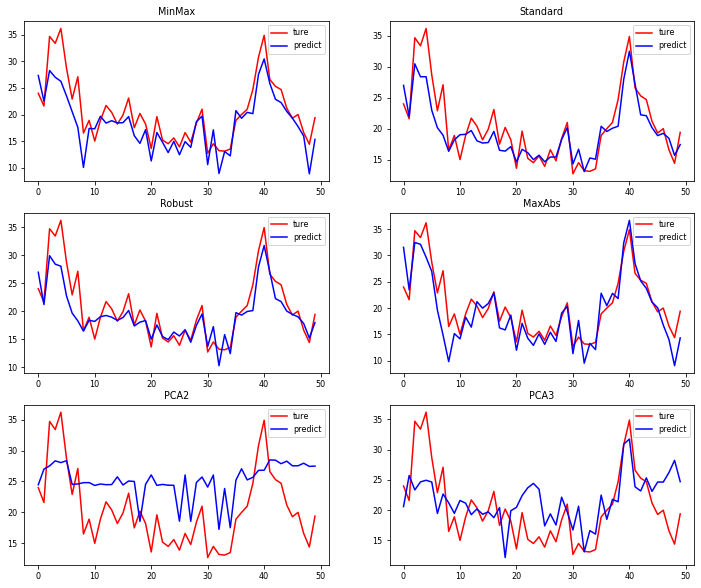

In [14]:
x = np.arange(0,50,1)
y_test = y[:50]

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.title('MinMax')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,minmax_pred,'b',label='predict')
plt.legend(loc='upper right')

plt.subplot(3,2,2)
plt.title('Standard')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,stand_pred,'b',label='predict')
plt.legend(loc='upper right')

plt.subplot(3,2,3)
plt.title('Robust')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,robust_pred,'b',label='predict')
plt.legend(loc='upper right')

plt.subplot(3,2,4)
plt.title('MaxAbs')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,maxabs_pred,'b',label='predict')
plt.legend(loc='upper right')

plt.subplot(3,2,5)
plt.title('PCA2')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,pca2_pred,'b',label='predict')
plt.legend(loc='upper right')

plt.subplot(3,2,6)
plt.title('PCA3')
plt.plot(x,y_test,'r',label='ture')
plt.plot(x,pca3_pred,'b',label='predict')
plt.legend(loc='upper right')